# 1.- Definir el objetivo del proyecto

- El gobierno nos pide analizar el cambio en el numero de muertes por año entre EUA y China y compararlos
- El objetivo es investigar cuáles son las causas de muerte más recurrentes en Estados unidos y China en los años comprendidos.en 1990 a 2019

# 2.- Cargar librerías y dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df=pd.read_csv('annual_deaths_by_causes.csv')
df.head()

country code  year  meningitis  alzheimer's_diesease  \
0  Afghanistan  AFG  2007      2933.0                1402.0   
1  Afghanistan  AFG  2008      2731.0                1424.0   
2  Afghanistan  AFG  2009      2460.0                1449.0   
3  Afghanistan  AFG  2011      2327.0                1508.0   
4  Afghanistan  AFG  2012      2254.0                1544.0   

   parkinson's_disease  nutritional_deficiency  malaria  drowning  \
0                450.0                  2488.0    393.0    2127.0   
1                455.0                  2277.0    255.0    1973.0   
2                460.0                  2040.0    239.0    1852.0   
3                473.0                  1846.0    390.0    1775.0   
4                482.0                  1705.0     94.0    1716.0   

   interpersonal_violence  ...  chronic_kidney_disease  poisonings  \
0                  3657.0  ...                  4490.0       512.0   
1                  3785.0  ...                  4534.0       495.0   
2                  3874.0  ...                  4597.0       483.0   
3                  4170.0  ...                  4785.0       483.0   
4                  4245.0  ...                  4846.0       482.0   

   protein_energy_malnutrition  terrorism  road_injuries  \
0                       2439.0     1199.0         7425.0   
1                       2231.0     1092.0         7355.0   
2                       1998.0     1065.0         7290.0   
3                       1805.0     1525.0         7432.0   
4                       1667.0     3521.0         7494.0   

   chronic_respiratory_diseases  chronic_liver_diseases  digestive_diseases  \
0                        7222.0                  3346.0              6458.0   
1                        7143.0                  3316.0              6408.0   
2                        7045.0                  3291.0              6358.0   
3                        6916.0                  3318.0              6370.0   
4                        6878.0                  3353.0              6398.0   

   fire_heat_hot_substance  acute_hepatitis  
0                    481.0           3437.0  
1                    462.0           3005.0  
2                    448.0           2663.0  
3                    448.0           2365.0  
4                    445.0           2264.0  

[5 rows x 35 columns]

# 3.- Exploración, organizacion y visualizaciones de los datos

In [ ]:
#el df no solo contiene data de paises, tambien de algunas ciudades
df.shape

(7273, 35)

In [ ]:
#todas las enfermedades
df.columns

Index(['country', 'code', 'year', 'meningitis', 'alzheimer's_diesease',
       'parkinson's_disease', 'nutritional_deficiency', 'malaria', 'drowning',
       'interpersonal_violence', 'maternal_disorders', 'hiv/aids',
       'drug_use_disorders', 'tuberculosis', 'cardiovascular_diseases',
       'lower_respiratory_infections', 'neonatal_disorders',
       'alcohol_use_disorders', 'self_harm', 'exposure_to_forces_of_nature',
       'diarrheal_diseases', 'environmental_heat_and_cold_exposure',
       'neoplasms', 'conflict_and_terrorism', 'diabetes_mellitus',
       'chronic_kidney_disease', 'poisonings', 'protein_energy_malnutrition',
       'terrorism', 'road_injuries', 'chronic_respiratory_diseases',
       'chronic_liver_diseases', 'digestive_diseases',
       'fire_heat_hot_substance', 'acute_hepatitis'],
      dtype='object')

In [ ]:
#¿hay datos nulos?
df.isnull().sum()

country                                    0
code                                    1067
year                                       0
meningitis                               433
alzheimer's_diesease                     433
parkinson's_disease                      433
nutritional_deficiency                   433
malaria                                  433
drowning                                 433
interpersonal_violence                   433
maternal_disorders                       433
hiv/aids                                 433
drug_use_disorders                       433
tuberculosis                             433
cardiovascular_diseases                  433
lower_respiratory_infections             433
neonatal_disorders                       433
alcohol_use_disorders                    433
self_harm                                433
exposure_to_forces_of_nature             433
diarrheal_diseases                       433
environmental_heat_and_cold_exposure     433
neoplasms 

In [ ]:
pd.options.display.max_rows = None#para no truncar la salida del value_counts
df['country'].value_counts()

Afghanistan                           30
Samoa                                 30
Niue                                  30
North America (WB)                    30
North Korea                           30
North Macedonia                       30
Northern Ireland                      30
Northern Mariana Islands              30
Norway                                30
OECD Countries                        30
Oman                                  30
Pakistan                              30
Palau                                 30
Palestine                             30
Panama                                30
Papua New Guinea                      30
Paraguay                              30
Peru                                  30
Philippines                           30
Poland                                30
Portugal                              30
Puerto Rico                           30
Qatar                                 30
Region of the Americas (WHO)          30
Romania         

In [ ]:
#eliminamos el codigo del pais, pues es irrelevante para las visualizaciones
df=df.drop(["code"], axis=1)
df.shape

(7273, 34)

In [ ]:
#definimos la data de interés; seleccionar solo las filas que contengan Unites states y China
df.set_index('country', inplace=True)
df_u_c= df.loc[['United States', 'China']]
df_u_c#dataset de china-estados unidos

year  meningitis  alzheimer's_diesease  parkinson's_disease  \
country                                                                      
United States  2007      1249.0              114585.0              23705.0   
United States  2008      1223.0              117064.0              24369.0   
United States  2009      1186.0              118965.0              24760.0   
United States  2010      1141.0              121781.0              25309.0   
United States  2011      1126.0              124656.0              26123.0   
United States  2012      1108.0              127120.0              26781.0   
United States  2013      1106.0              129640.0              27531.0   
United States  2014      1102.0              131616.0              28193.0   
United States  2015      1115.0              134411.0              29081.0   
United States  2016      1131.0              136673.0              29748.0   
United States  1990      1830.0               73079.0              12895.0   
United States  1991      1615.0               78365.0              13217.0   
United States  1992      1558.0               83053.0              13600.0   
United States  1993      1550.0               87768.0              14301.0   
United States  1994      1530.0               91491.0              14816.0   
United States  1995      1514.0               94855.0              15434.0   
United States  1996      1504.0               96526.0              15962.0   
United States  1997      1514.0               96342.0              16545.0   
United States  1998      1517.0               95816.0              17349.0   
United States  1999      1566.0               95512.0              18354.0   
United States  2000      1458.0               96426.0              19242.0   
United States  2001      1399.0               98558.0              20082.0   
United States  2002      1367.0              101170.0              20907.0   
United States  2003      1344.0              104024.0              21562.0   
United States  2004      1293.0              106572.0              21922.0   
United States  2005      1288.0              109900.0              22755.0   
United States  2006      1273.0              112291.0              23243.0   
United States  2017      1137.0              138750.0              30014.0   
United States  2018      1142.0              141681.0              31277.0   
United States  2019      1146.0              143919.0              32211.0   
China          2007      8407.0              187358.0              52766.0   
China          2008      8384.0              197380.0              54828.0   
China          2009      8394.0              208139.0              57485.0   
China          2010      8341.0              218436.0              60241.0   
China          2011      8193.0              225852.0              61781.0   
China          2012      8057.0              232656.0              62640.0   
China          2013      7971.0              239240.0              63853.0   
China          2014      7740.0              249056.0              65555.0   
China          2015      7553.0              259217.0              66761.0   
China          2016      7550.0              275481.0              69364.0   
China          1990     37473.0               93316.0              31920.0   
China          1991     36834.0               95470.0              32607.0   
China          1992     35086.0               98135.0              33287.0   
China          1993     33396.0              100822.0              34129.0   
China          1994     31752.0              103621.0              34680.0   
China          1995     29319.0              106958.0              35450.0   
China          1996     26788.0              111481.0              36703.0   
China          1997     23987.0              116489.0              37807.0   
China          1998     21485.0              121766.0              38955.0   
China          1999     19295.0      

In [ ]:
df_u_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, United States to China
Data columns (total 33 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   year                                  60 non-null     int64  
 1   meningitis                            60 non-null     float64
 2   alzheimer's_diesease                  60 non-null     float64
 3   parkinson's_disease                   60 non-null     float64
 4   nutritional_deficiency                60 non-null     float64
 5   malaria                               60 non-null     float64
 6   drowning                              60 non-null     float64
 7   interpersonal_violence                60 non-null     float64
 8   maternal_disorders                    60 non-null     float64
 9   hiv/aids                              60 non-null     float64
 10  drug_use_disorders                    60 non-null     float64
 11  tuberculosi

In [ ]:
df_u_c.shape

(60, 33)

In [ ]:
df_u_c.value_counts('country')

country
China            30
United States    30
dtype: int64

In [ ]:
#data de Estados unidos
df_unites=df_u_c.loc[['United States']]
df_unites

year  meningitis  alzheimer's_diesease  parkinson's_disease  \
country                                                                      
United States  2007      1249.0              114585.0              23705.0   
United States  2008      1223.0              117064.0              24369.0   
United States  2009      1186.0              118965.0              24760.0   
United States  2010      1141.0              121781.0              25309.0   
United States  2011      1126.0              124656.0              26123.0   
United States  2012      1108.0              127120.0              26781.0   
United States  2013      1106.0              129640.0              27531.0   
United States  2014      1102.0              131616.0              28193.0   
United States  2015      1115.0              134411.0              29081.0   
United States  2016      1131.0              136673.0              29748.0   
United States  1990      1830.0               73079.0              12895.0   
United States  1991      1615.0               78365.0              13217.0   
United States  1992      1558.0               83053.0              13600.0   
United States  1993      1550.0               87768.0              14301.0   
United States  1994      1530.0               91491.0              14816.0   
United States  1995      1514.0               94855.0              15434.0   
United States  1996      1504.0               96526.0              15962.0   
United States  1997      1514.0               96342.0              16545.0   
United States  1998      1517.0               95816.0              17349.0   
United States  1999      1566.0               95512.0              18354.0   
United States  2000      1458.0               96426.0              19242.0   
United States  2001      1399.0               98558.0              20082.0   
United States  2002      1367.0              101170.0              20907.0   
United States  2003      1344.0              104024.0              21562.0   
United States  2004      1293.0              106572.0              21922.0   
United States  2005      1288.0              109900.0              22755.0   
United States  2006      1273.0              112291.0              23243.0   
United States  2017      1137.0              138750.0              30014.0   
United States  2018      1142.0              141681.0              31277.0   
United States  2019      1146.0              143919.0              32211.0   

               nutritional_deficiency  malaria  drowning  \
country                                                    
United States                  4238.0      0.0    3864.0   
United States                  4280.0      0.0    3819.0   
United States                  4277.0      0.0    3753.0   
United States                  4367.0      0.0    3684.0   
United States                  4538.0      0.0    3669.0   
United States                  4707.0      0.0    3647.0   
United States                  4943.0      0.0    3606.0   
United States                  5268.0      0.0    3627.0   
United States                  5661.0      0.0    3727.0   
United States                  5952.0      0.0    3846.0   
United States                  2795.0      0.0    4370.0   
United States                  2855.0      0.0    4246.0   
United States                  2945.0      0.0    4069.0   
United States                  3148.0      0.0    4075.0   
United States                  3312.0      0.0    3999.0   
United States                  3530.0      0.0    3967.0   
United States                  3741.0      0.0    3857.0   
United States                  3978.0      0.0    3810.0   
United States                  4263.0      0.0    3831.0   
United States                  4617.0      0.0    3749.0   
United States                  4760.0      0.0    3728.0   
United States                  4736.0      0.0    3720.0   
United States                  4704.0      0.0    3772.0   
United States     

In [ ]:
#data de china
df_chi=df_u_c.loc[['China']]
df_chi

year  meningitis  alzheimer's_diesease  parkinson's_disease  \
country                                                                
China    2007      8407.0              187358.0              52766.0   
China    2008      8384.0              197380.0              54828.0   
China    2009      8394.0              208139.0              57485.0   
China    2010      8341.0              218436.0              60241.0   
China    2011      8193.0              225852.0              61781.0   
China    2012      8057.0              232656.0              62640.0   
China    2013      7971.0              239240.0              63853.0   
China    2014      7740.0              249056.0              65555.0   
China    2015      7553.0              259217.0              66761.0   
China    2016      7550.0              275481.0              69364.0   
China    1990     37473.0               93316.0              31920.0   
China    1991     36834.0               95470.0              32607.0   
China    1992     35086.0               98135.0              33287.0   
China    1993     33396.0              100822.0              34129.0   
China    1994     31752.0              103621.0              34680.0   
China    1995     29319.0              106958.0              35450.0   
China    1996     26788.0              111481.0              36703.0   
China    1997     23987.0              116489.0              37807.0   
China    1998     21485.0              121766.0              38955.0   
China    1999     19295.0              127660.0              40894.0   
China    2000     16947.0              134438.0              43357.0   
China    2001     14740.0              141288.0              45240.0   
China    2002     12828.0              148675.0              47020.0   
China    2003     11265.0              156132.0              48660.0   
China    2004     10297.0              163879.0              50802.0   
China    2005      9502.0              170967.0              52138.0   
China    2006      8824.0              178510.0              51900.0   
China    2017      7228.0              291962.0              71490.0   
China    2018      6798.0              306747.0              73789.0   
China    2019      6465.0              320715.0              76990.0   

         nutritional_deficiency  malaria  drowning  interpersonal_violence  \
country                                                                      
China                   10611.0     21.0   76277.0                 23339.0   
China                   10623.0     15.0   73624.0                 21775.0   
China                   10874.0      9.0   72888.0                 20659.0   
China                   11293.0     12.0   70955.0                 18926.0   
China                   11739.0     11.0   66696.0                 17477.0   
China                   12120.0      0.0   65110.0                 16177.0   
China                   12748.0      0.0   63152.0                 15134.0   
China                   13528.0      0.0   62733.0                 14194.0   
China                   14487.0      0.0   61489.0                 13512.0   
China                   15827.0      0.0   61049.0                 13076.0   
China                   42176.0   1535.0  153773.0                 40143.0   
China                   42446.0   2245.0  150399.0                 39187.0   
China                   37980.0   2061.0  144949.0                 38179.0   
China                   35265.0   1327.0  142119.0                 37525.0   
China                   32825.0   1146.0  138993.0                 38146.0   
China                   29567.0   1068.0  136083.0                 37763.0   
China                   27043.0    930.0  130813.0                 36192.0   
China                   24625.0    946.0  124856.0                 34972.0   
China                   22088.0    558.0  121543.0                 34164.0   
China                   19966.0   1142.0  115349.0                

In [ ]:
#EUA
df_unites.describe()

year   meningitis  alzheimer's_diesease  parkinson's_disease  \
count    30.000000    30.000000             30.000000            30.000000   
mean   2004.500000  1334.400000         110086.966667         22042.933333   
std       8.803408   199.012666          19757.283337          5875.396485   
min    1990.000000  1102.000000          73079.000000         12895.000000   
25%    1997.250000  1141.250000          95947.500000         16746.000000   
50%    2004.500000  1290.500000         108236.000000         22338.500000   
75%    2011.750000  1514.000000         126504.000000         26616.500000   
max    2019.000000  1830.000000         143919.000000         32211.000000   

       nutritional_deficiency  malaria     drowning  interpersonal_violence  \
count                30.00000     30.0    30.000000               30.000000   
mean               4434.80000      0.0  3825.066667            19893.933333   
std                 910.49681      0.0   179.842064             2870.394325   
min                2795.00000      0.0  3606.000000            16618.000000   
25%                4043.00000      0.0  3721.750000            18105.500000   
50%                4382.00000      0.0  3770.500000            18871.000000   
75%                4754.00000      0.0  3862.250000            20230.000000   
max                6090.00000      0.0  4370.000000            26081.000000   

       maternal_disorders      hiv/aids  ...  chronic_kidney_disease  \
count           30.000000     30.000000  ...               30.000000   
mean           840.200000  17613.900000  ...            67283.233333   
std            275.032964  11956.977583  ...            24602.902169   
min            489.000000   7053.000000  ...            33101.000000   
25%            535.000000   8086.750000  ...            44147.250000   
50%            955.500000  14127.500000  ...            65246.500000   
75%           1075.500000  18865.500000  ...            88641.250000   
max           1252.000000  45213.000000  ...           106954.000000   

        poisonings  protein_energy_malnutrition    terrorism  road_injuries  \
count    30.000000                    30.000000    27.000000      30.000000   
mean   1341.966667                  4034.333333   130.925926   45324.800000   
std     173.044639                   919.310661   576.316615    3401.309742   
min    1079.000000                  2419.000000     0.000000   39785.000000   
25%    1198.000000                  3585.000000     1.500000   41895.500000   
50%    1336.500000                  4000.500000     4.000000   47190.500000   
75%    1483.000000                  4335.250000    21.500000   48027.250000   
max    1642.000000                  5710.000000  3008.000000   49318.000000   

       chronic_respiratory_diseases  chronic_liver_diseases  \
count                     30.000000               30.000000   
mean                  164968.400000            50477.500000   
std                    34211.827894            10219.366877   
min                   106098.000000            37386.000000   
25%                   137074.000000            40852.000000   
50%                   165359.500000            48857.500000   
75%                   190558.250000            58912.750000   
max                   224988.000000            67286.000000   

       digestive_diseases  fire_heat_hot_substance  acute_hepatitis  
count           30.000000                30.000000        30.000000  
mean        100898.100000              4223.733333       195.033333  
std          15863.267575               532.044718        67.106957  
min          78301.000000              3416.000000       120.000000  
25%          86576.250000              3804.000000       129.000000  
50%          99420.000000              4209.500000       195.500000  
75%         112832.250000              4471.500000       253.500000  
max         129343.000000              5336.000000       323.000000  

[8 rows x 33 columns]

- El promedio de gente muerta en 30 años, desde 1990 hasta 2019, por enfermedad:
- por meninguitis: 1334
- por violencia interpersonal: 19893
- .....
- El minimo y maximo numero de muertes que hubo en esos 30 años en un año determinado por enfermedad:
- Por violencia interpersonal: 16618.000000	y 26081.000000
- ....etc

In [ ]:
df_unites.shape

(30, 33)

In [ ]:
#data nula de eua
df_unites.isnull().sum()

year                                    0
meningitis                              0
alzheimer's_diesease                    0
parkinson's_disease                     0
nutritional_deficiency                  0
malaria                                 0
drowning                                0
interpersonal_violence                  0
maternal_disorders                      0
hiv/aids                                0
drug_use_disorders                      0
tuberculosis                            0
cardiovascular_diseases                 0
lower_respiratory_infections            0
neonatal_disorders                      0
alcohol_use_disorders                   0
self_harm                               0
exposure_to_forces_of_nature            0
diarrheal_diseases                      0
environmental_heat_and_cold_exposure    0
neoplasms                               0
conflict_and_terrorism                  0
diabetes_mellitus                       0
chronic_kidney_disease            

In [ ]:
#china
df_chi.describe()

year    meningitis  alzheimer's_diesease  parkinson's_disease  \
count    30.000000     30.000000             30.000000            30.000000   
mean   2004.500000  16029.966667         179394.866667         51103.066667   
std       8.803408  10592.869226          69154.539350         13801.021042   
min    1990.000000   6465.000000          93316.000000         31920.000000   
25%    1997.250000   8091.000000         117808.250000         38094.000000   
50%    2004.500000   9899.500000         167423.000000         51351.000000   
75%    2011.750000  23361.500000         230955.000000         62425.250000   
max    2019.000000  37473.000000         320715.000000         76990.000000   

       nutritional_deficiency      malaria      drowning  \
count               30.000000    30.000000      30.00000   
mean             19474.533333   447.266667   95787.30000   
std               9878.354860   676.220375   32654.10694   
min              10611.000000     0.000000   56524.00000   
25%              12052.500000     2.250000   65506.50000   
50%              16079.500000    40.000000   88215.00000   
75%              23990.750000   942.000000  124027.75000   
max              42446.000000  2245.000000  153773.00000   

       interpersonal_violence  maternal_disorders      hiv/aids  ...  \
count               30.000000           30.000000     30.000000  ...   
mean             25875.833333         8108.566667  14456.966667  ...   
std               9675.094818         5247.966579   8608.553567  ...   
min              11970.000000         1537.000000   2698.000000  ...   
25%              16502.000000         3098.750000   7603.750000  ...   
50%              27224.000000         6938.500000  14107.500000  ...   
75%              34770.000000        13664.000000  16986.750000  ...   
max              40143.000000        17400.000000  31746.000000  ...   

       chronic_kidney_disease    poisonings  protein_energy_malnutrition  \
count               30.000000     30.000000                    30.000000   
mean            139842.533333  25671.333333                 16922.133333   
std              32386.190419   3783.090967                 10299.718017   
min              98607.000000  20528.000000                  7878.000000   
25%             108000.750000  21503.750000                  9166.750000   
50%             139913.500000  26972.500000                 12556.000000   
75%             168578.750000  29023.000000                 22358.000000   
max             196726.000000  30883.000000                 40380.000000   

        terrorism  road_injuries  chronic_respiratory_diseases  \
count   25.000000      30.000000                  3.000000e+01   
mean    39.520000  278346.633333                  1.222561e+06   
std     72.493747   36633.979027                  1.270699e+05   
min      0.000000  226374.000000                  1.029418e+06   
25%      5.000000  249110.750000                  1.092912e+06   
50%     13.000000  274365.000000                  1.288362e+06   
75%     37.000000  315109.750000                  1.335090e+06   
max    322.000000  329237.000000                  1.366039e+06   

       chronic_liver_diseases  digestive_diseases  fire_heat_hot_substance  \
count               30.000000           30.000000                30.000000   
mean            163963.300000       297496.866667             12780.066667   
std               9362.052417        18175.895663              2195.396264   
min             148056.000000       270036.000000             10738.000000   
25%             156091.750000       278801.750000             11110.000000   
50%             166432.500000       299530.000000             11839.000000   
75%             169692.500000       312475.750000             13892.750000   
max             179149.000000       325511.000000             17289.000000   

       acute_hepatitis  
count        30.000000  
mean      10618.800000  
std        7629.913998  
min        3726.000000  
25% 

- Se puede hacer el mismo analisis que con eua (se omite aqui por practicidad)

In [ ]:
#data nula de china
df_chi.isnull().sum()

year                                    0
meningitis                              0
alzheimer's_diesease                    0
parkinson's_disease                     0
nutritional_deficiency                  0
malaria                                 0
drowning                                0
interpersonal_violence                  0
maternal_disorders                      0
hiv/aids                                0
drug_use_disorders                      0
tuberculosis                            0
cardiovascular_diseases                 0
lower_respiratory_infections            0
neonatal_disorders                      0
alcohol_use_disorders                   0
self_harm                               0
exposure_to_forces_of_nature            0
diarrheal_diseases                      0
environmental_heat_and_cold_exposure    0
neoplasms                               0
conflict_and_terrorism                  0
diabetes_mellitus                       0
chronic_kidney_disease            

Notamos que en los datasets de eua y china hay data nula minima, podemos rellenarla con algun metodo, pero al ser menos del 15% de la data total de la observacion correspondiente, lo omitimos.

### Visuzalizaciones

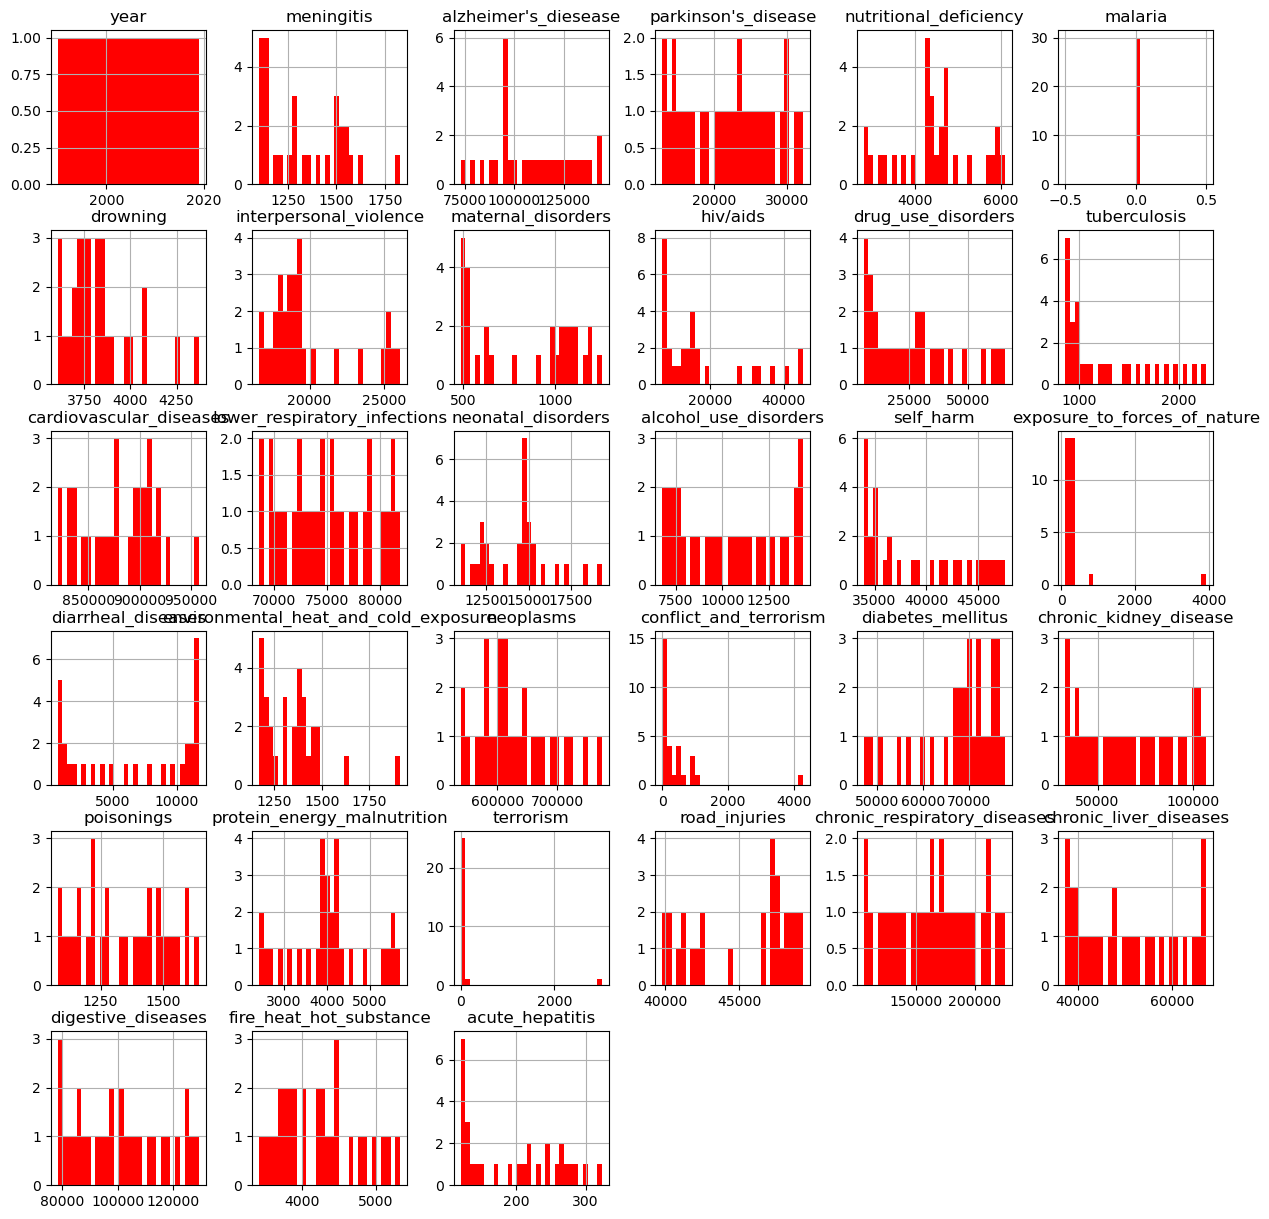

In [ ]:
#distribuciones de las enfermedades en EUA
df_unites.hist(bins=30, figsize=(15, 15), color='r')
plt.show()

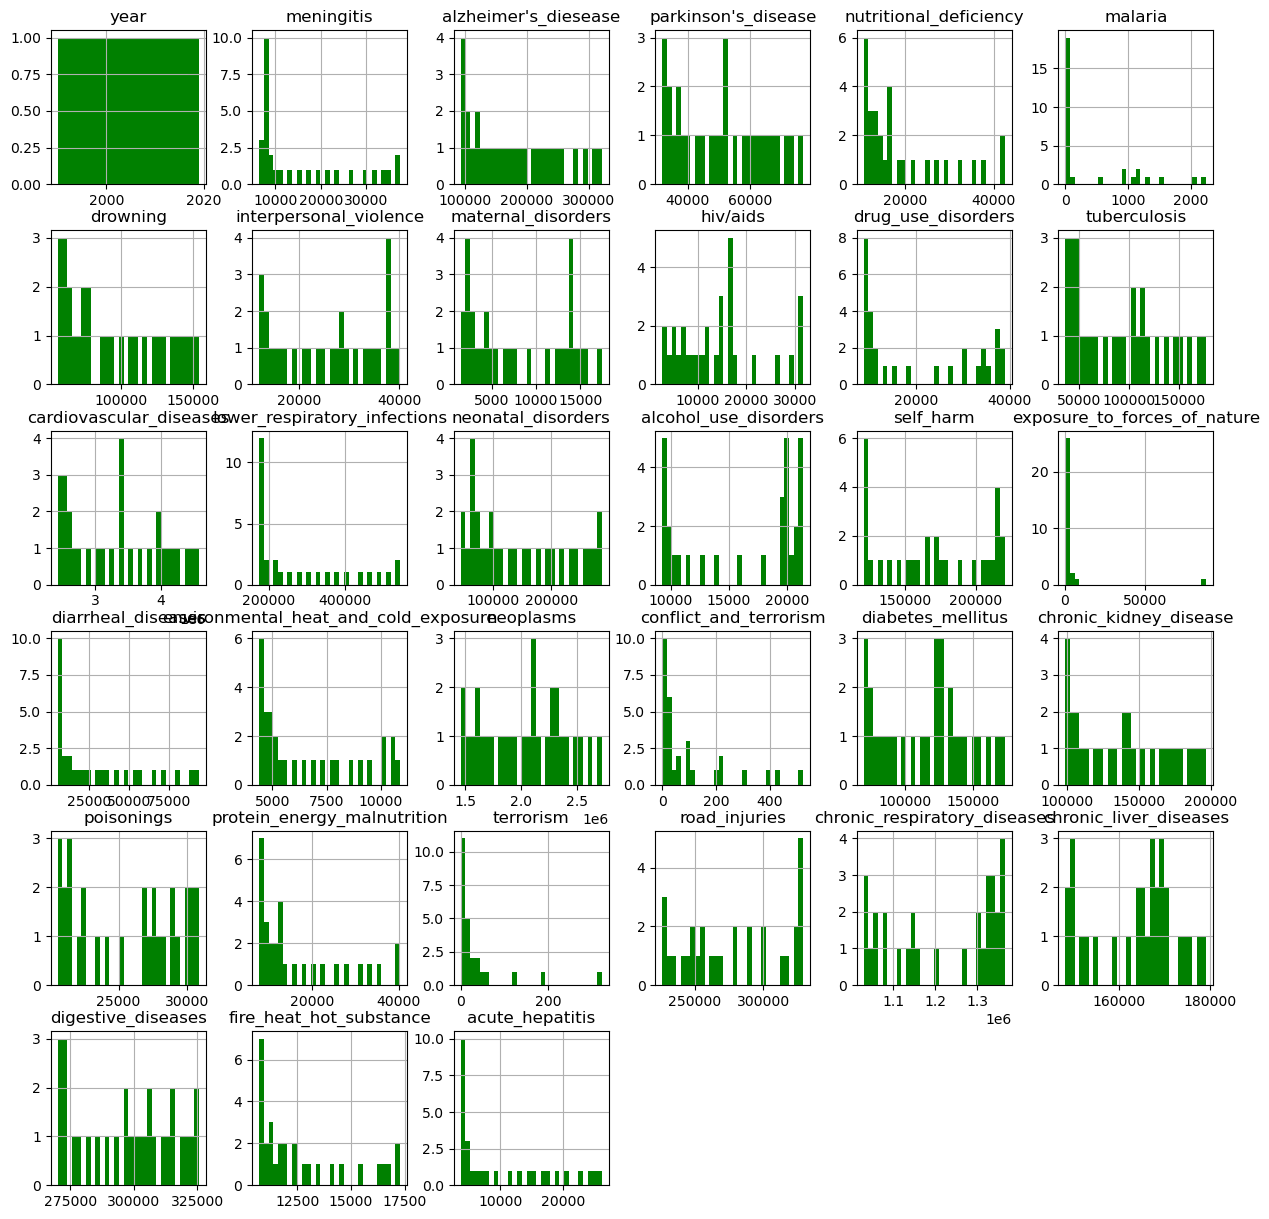

In [ ]:
#china
df_chi.hist(bins=30, figsize=(15, 15), color='g')
plt.show()

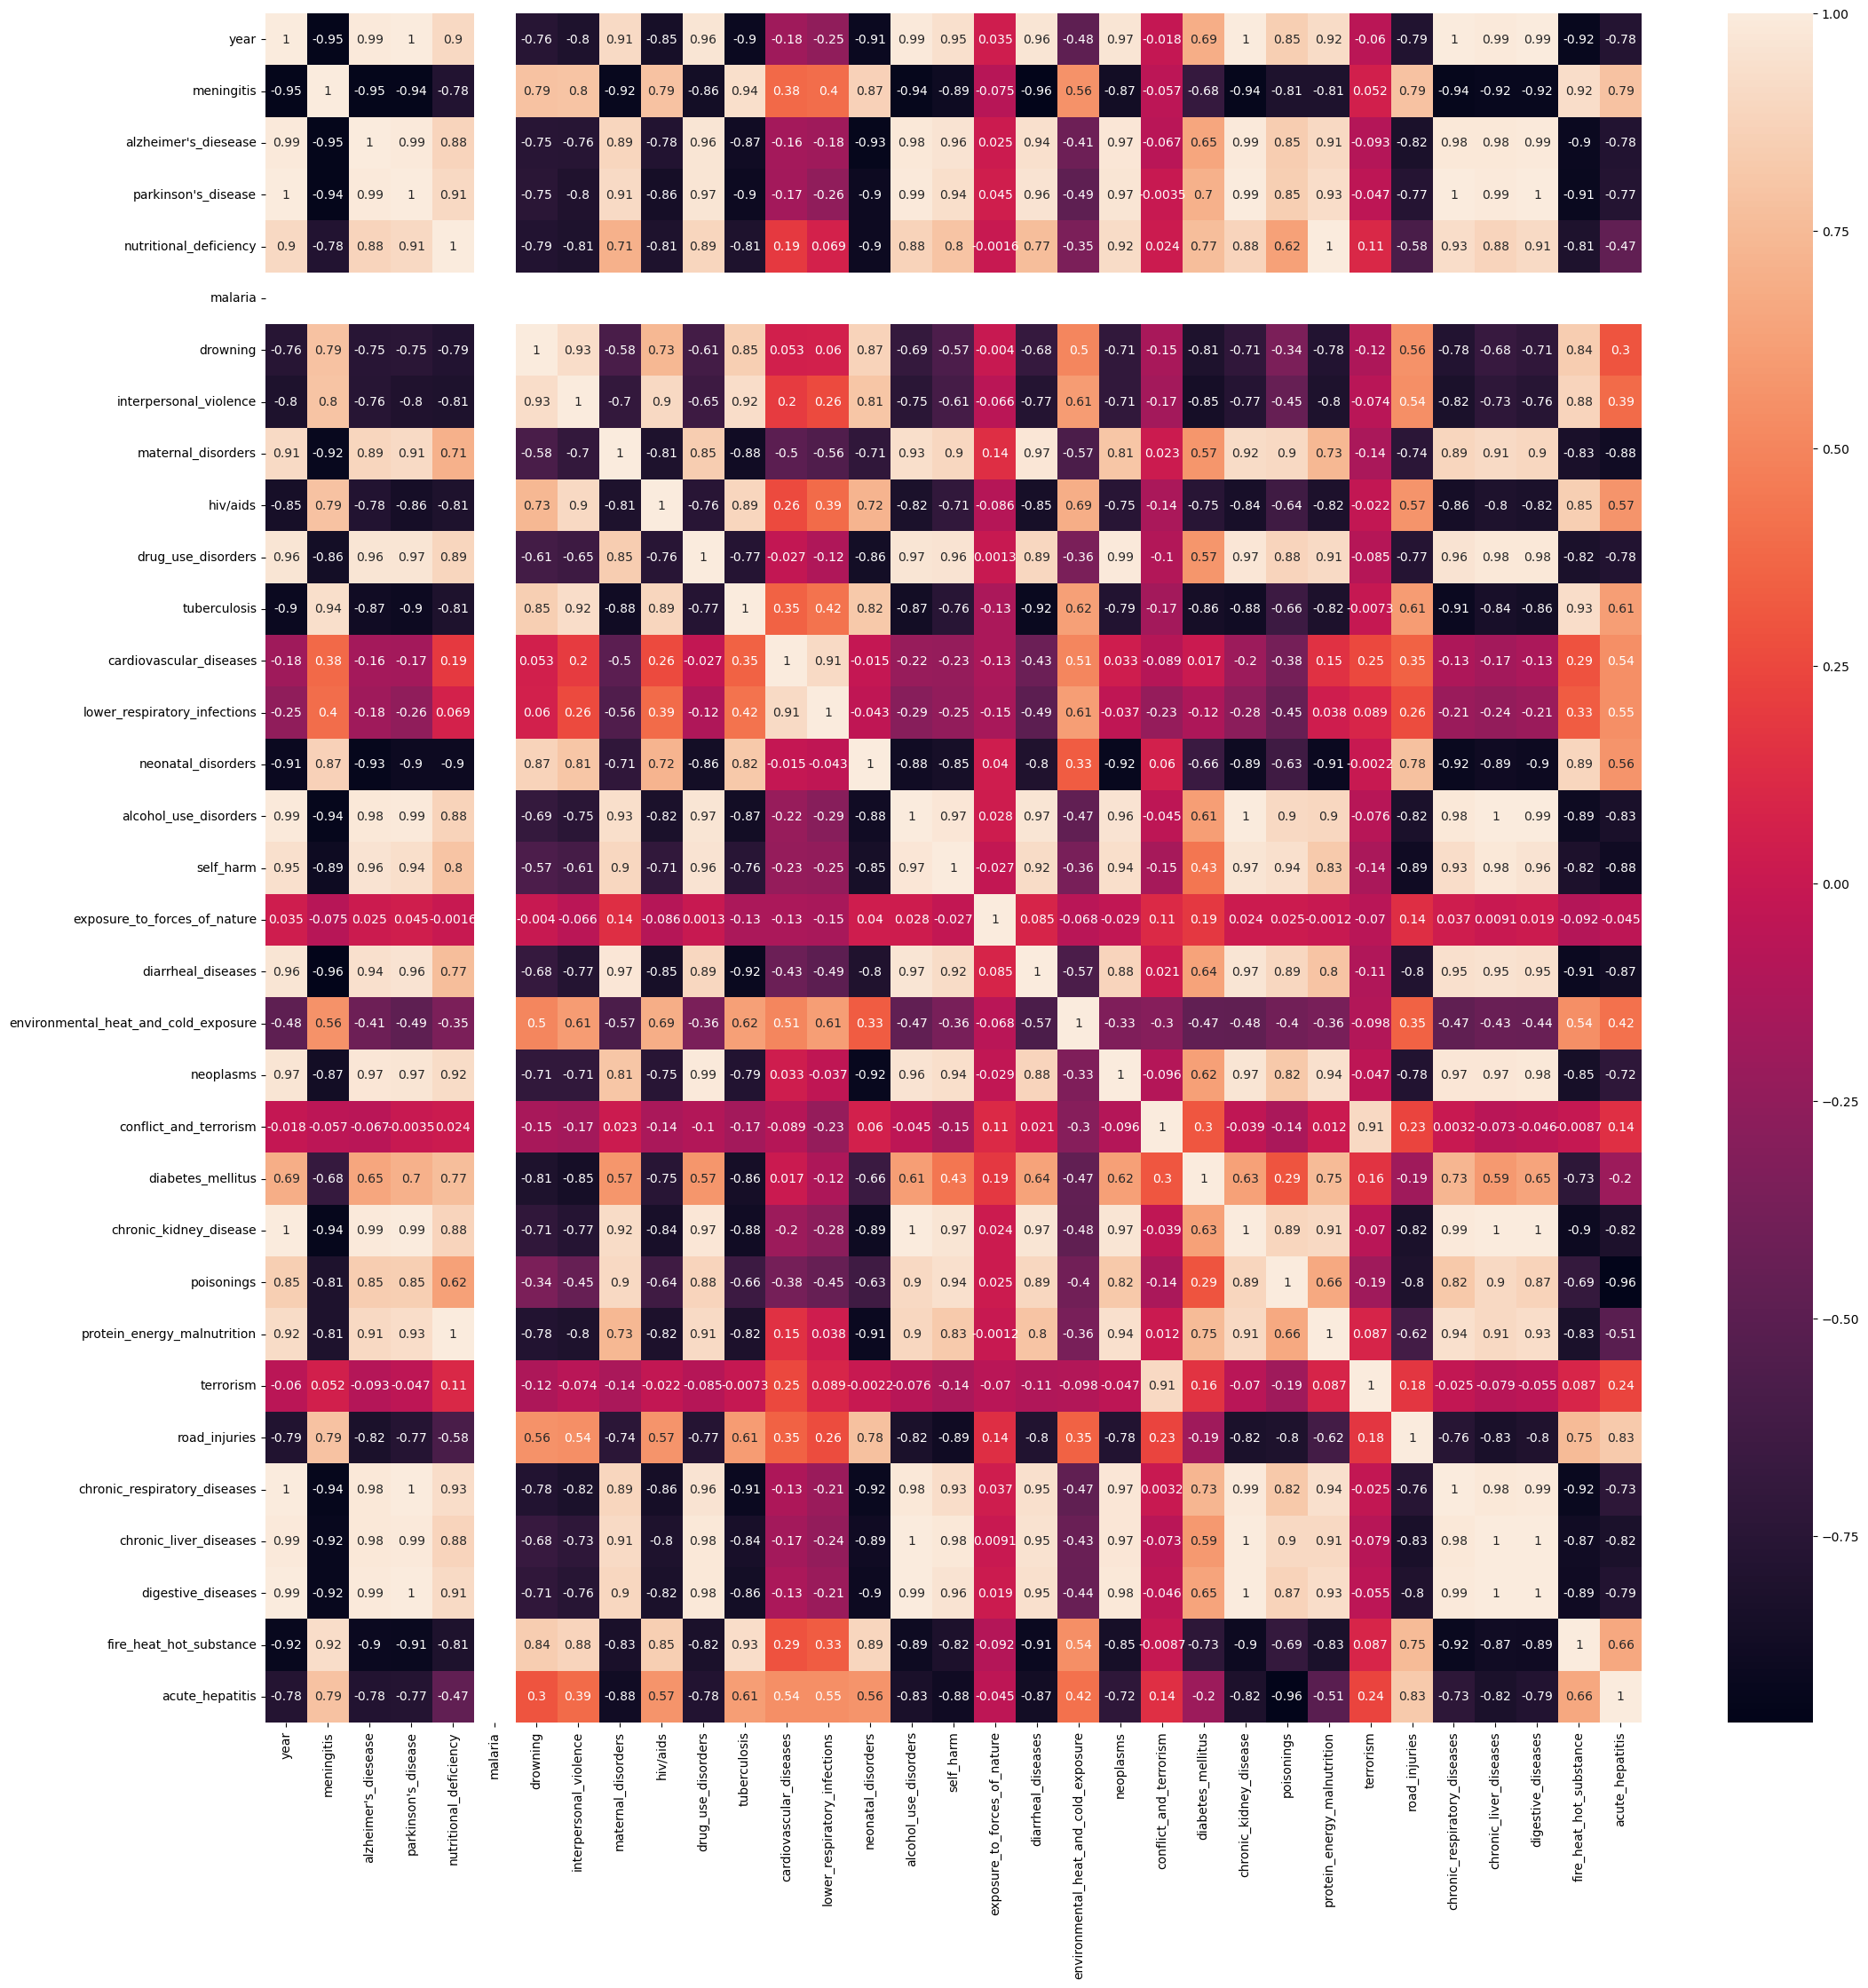

In [ ]:
#matriz de correlaciones (en forma de calor para saber el grado de relacion lineal entre las variables)
correlations=df_unites.corr()
f, ax = plt.subplots(figsize = (25,25))
sns.heatmap(correlations, annot=True)
plt.show()

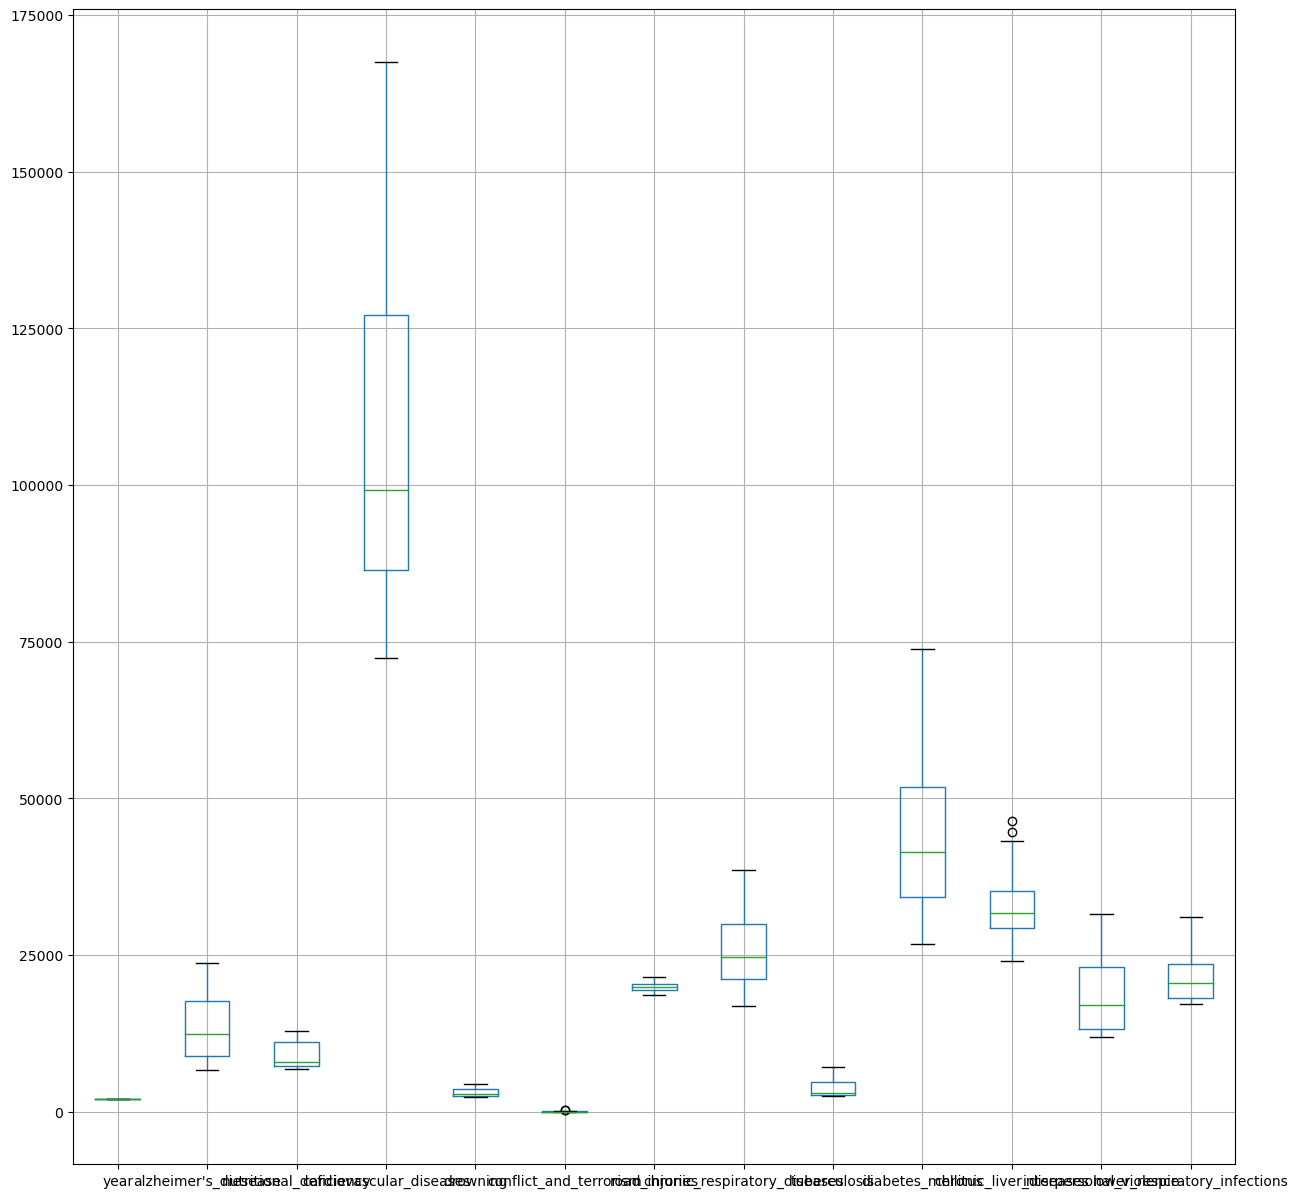

In [ ]:
#EUA, box plot, para darnos una idea de la distribucion de las variables.
df_unites.boxplot(figsize=(15,15))
plt.show()

In [ ]:
#para china
correlations=df_chi.corr()
f, ax = plt.subplots(figsize = (25,25))
sns.heatmap(correlations, annot=True)
plt.show()

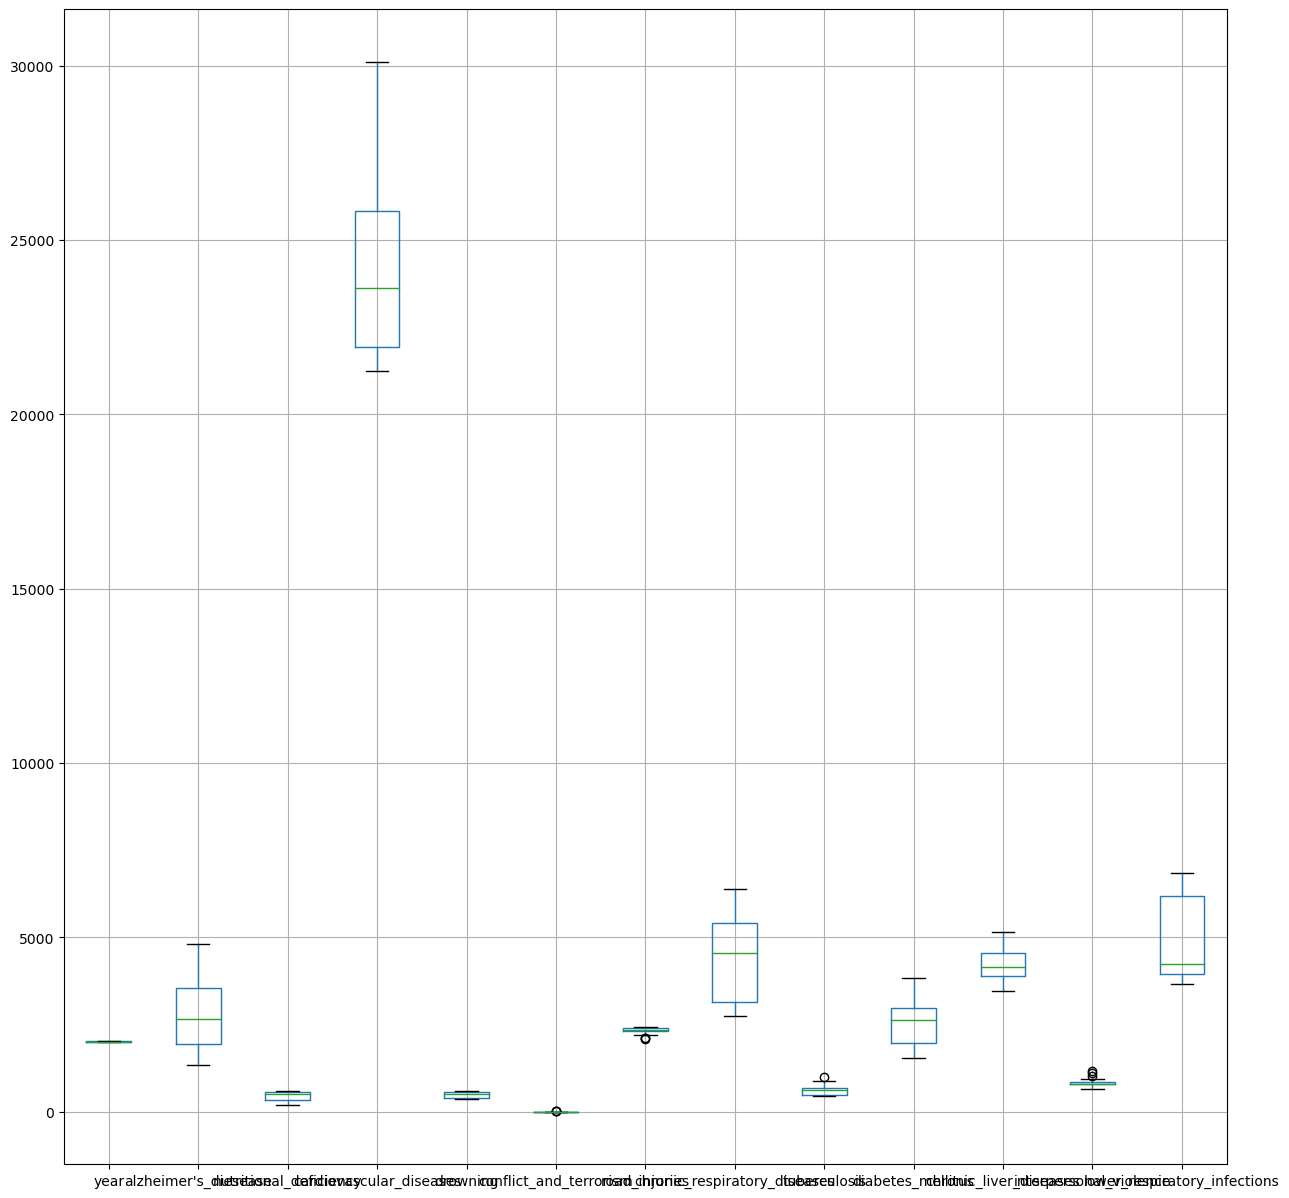

In [ ]:
#china
df_chi.boxplot(figsize=(15,15))
plt.show()

Para estos ultimos 4 graficos se le puede dar un analisis mucho mas profundo y obtener insights.

In [ ]:
df_unites.head(2)

year  meningitis  alzheimer's_diesease  parkinson's_disease  \
country                                                                      
United States  2007      1249.0              114585.0              23705.0   
United States  2008      1223.0              117064.0              24369.0   

               nutritional_deficiency  malaria  drowning  \
country                                                    
United States                  4238.0      0.0    3864.0   
United States                  4280.0      0.0    3819.0   

               interpersonal_violence  maternal_disorders  hiv/aids  ...  \
country                                                              ...   
United States                 19370.0              1062.0   12444.0  ...   
United States                 18716.0              1103.0   11400.0  ...   

               chronic_kidney_disease  poisonings  \
country                                             
United States                 72852.0      1414.0   
United States                 76152.0      1435.0   

               protein_energy_malnutrition  terrorism  road_injuries  \
country                                                                
United States                       3861.0        0.0        46498.0   
United States                       3907.0        2.0        44535.0   

               chronic_respiratory_diseases  chronic_liver_diseases  \
country                                                               
United States                      172341.0                 51575.0   
United States                      177366.0                 53086.0   

               digestive_diseases  fire_heat_hot_substance  acute_hepatitis  
country                                                                      
United States            103120.0                   4301.0            152.0  
United States            105255.0                   3927.0            144.0  

[2 rows x 33 columns]

In [ ]:
df_unites.columns

Index(['year', 'meningitis', 'alzheimer's_diesease', 'parkinson's_disease',
       'nutritional_deficiency', 'malaria', 'drowning',
       'interpersonal_violence', 'maternal_disorders', 'hiv/aids',
       'drug_use_disorders', 'tuberculosis', 'cardiovascular_diseases',
       'lower_respiratory_infections', 'neonatal_disorders',
       'alcohol_use_disorders', 'self_harm', 'exposure_to_forces_of_nature',
       'diarrheal_diseases', 'environmental_heat_and_cold_exposure',
       'neoplasms', 'conflict_and_terrorism', 'diabetes_mellitus',
       'chronic_kidney_disease', 'poisonings', 'protein_energy_malnutrition',
       'terrorism', 'road_injuries', 'chronic_respiratory_diseases',
       'chronic_liver_diseases', 'digestive_diseases',
       'fire_heat_hot_substance', 'acute_hepatitis'],
      dtype='object')

In [ ]:
df_unites.shape

(30, 33)

In [ ]:
#ordenamos del menor año al mayor año
df_unites = df_unites.sort_values('year', ascending=True)
df_unites.head(30)

year  meningitis  alzheimer's_diesease  parkinson's_disease  \
country                                                                      
United States  1990      1830.0               73079.0              12895.0   
United States  1991      1615.0               78365.0              13217.0   
United States  1992      1558.0               83053.0              13600.0   
United States  1993      1550.0               87768.0              14301.0   
United States  1994      1530.0               91491.0              14816.0   
United States  1995      1514.0               94855.0              15434.0   
United States  1996      1504.0               96526.0              15962.0   
United States  1997      1514.0               96342.0              16545.0   
United States  1998      1517.0               95816.0              17349.0   
United States  1999      1566.0               95512.0              18354.0   
United States  2000      1458.0               96426.0              19242.0   
United States  2001      1399.0               98558.0              20082.0   
United States  2002      1367.0              101170.0              20907.0   
United States  2003      1344.0              104024.0              21562.0   
United States  2004      1293.0              106572.0              21922.0   
United States  2005      1288.0              109900.0              22755.0   
United States  2006      1273.0              112291.0              23243.0   
United States  2007      1249.0              114585.0              23705.0   
United States  2008      1223.0              117064.0              24369.0   
United States  2009      1186.0              118965.0              24760.0   
United States  2010      1141.0              121781.0              25309.0   
United States  2011      1126.0              124656.0              26123.0   
United States  2012      1108.0              127120.0              26781.0   
United States  2013      1106.0              129640.0              27531.0   
United States  2014      1102.0              131616.0              28193.0   
United States  2015      1115.0              134411.0              29081.0   
United States  2016      1131.0              136673.0              29748.0   
United States  2017      1137.0              138750.0              30014.0   
United States  2018      1142.0              141681.0              31277.0   
United States  2019      1146.0              143919.0              32211.0   

               nutritional_deficiency  malaria  drowning  \
country                                                    
United States                  2795.0      0.0    4370.0   
United States                  2855.0      0.0    4246.0   
United States                  2945.0      0.0    4069.0   
United States                  3148.0      0.0    4075.0   
United States                  3312.0      0.0    3999.0   
United States                  3530.0      0.0    3967.0   
United States                  3741.0      0.0    3857.0   
United States                  3978.0      0.0    3810.0   
United States                  4263.0      0.0    3831.0   
United States                  4617.0      0.0    3749.0   
United States                  4760.0      0.0    3728.0   
United States                  4736.0      0.0    3720.0   
United States                  4704.0      0.0    3772.0   
United States                  4570.0      0.0    3761.0   
United States                  4392.0      0.0    3747.0   
United States                  4372.0      0.0    3850.0   
United States                  4257.0      0.0    3888.0   
United States                  4238.0      0.0    3864.0   
United States                  4280.0      0.0    3819.0   
United States                  4277.0      0.0    3753.0   
United States                  4367.0      0.0    3684.0   
United States                  4538.0      0.0    3669.0   
United States                  4707.0      0.0    3647.0   
United States     

In [ ]:
#ordenamos del mayor al menor año
df_chi = df_chi.sort_values('year', ascending=True)
df_chi.head(30)

year  meningitis  alzheimer's_diesease  parkinson's_disease  \
country                                                                
China    1990     37473.0               93316.0              31920.0   
China    1991     36834.0               95470.0              32607.0   
China    1992     35086.0               98135.0              33287.0   
China    1993     33396.0              100822.0              34129.0   
China    1994     31752.0              103621.0              34680.0   
China    1995     29319.0              106958.0              35450.0   
China    1996     26788.0              111481.0              36703.0   
China    1997     23987.0              116489.0              37807.0   
China    1998     21485.0              121766.0              38955.0   
China    1999     19295.0              127660.0              40894.0   
China    2000     16947.0              134438.0              43357.0   
China    2001     14740.0              141288.0              45240.0   
China    2002     12828.0              148675.0              47020.0   
China    2003     11265.0              156132.0              48660.0   
China    2004     10297.0              163879.0              50802.0   
China    2005      9502.0              170967.0              52138.0   
China    2006      8824.0              178510.0              51900.0   
China    2007      8407.0              187358.0              52766.0   
China    2008      8384.0              197380.0              54828.0   
China    2009      8394.0              208139.0              57485.0   
China    2010      8341.0              218436.0              60241.0   
China    2011      8193.0              225852.0              61781.0   
China    2012      8057.0              232656.0              62640.0   
China    2013      7971.0              239240.0              63853.0   
China    2014      7740.0              249056.0              65555.0   
China    2015      7553.0              259217.0              66761.0   
China    2016      7550.0              275481.0              69364.0   
China    2017      7228.0              291962.0              71490.0   
China    2018      6798.0              306747.0              73789.0   
China    2019      6465.0              320715.0              76990.0   

         nutritional_deficiency  malaria  drowning  interpersonal_violence  \
country                                                                      
China                   42176.0   1535.0  153773.0                 40143.0   
China                   42446.0   2245.0  150399.0                 39187.0   
China                   37980.0   2061.0  144949.0                 38179.0   
China                   35265.0   1327.0  142119.0                 37525.0   
China                   32825.0   1146.0  138993.0                 38146.0   
China                   29567.0   1068.0  136083.0                 37763.0   
China                   27043.0    930.0  130813.0                 36192.0   
China                   24625.0    946.0  124856.0                 34972.0   
China                   22088.0    558.0  121543.0                 34164.0   
China                   19966.0   1142.0  115349.0                 33074.0   
China                   18083.0    120.0  111301.0                 31227.0   
China                   16332.0     35.0  105437.0                 29311.0   
China                   14403.0     60.0  100416.0                 27998.0   
China                   12952.0     46.0   94274.0                 27976.0   
China                   12030.0     51.0   90532.0                 27869.0   
China                   11457.0     44.0   85898.0                 26579.0   
China                   11083.0     36.0   79135.0                 25011.0   
China                   10611.0     21.0   76277.0                 23339.0   
China                   10623.0     15.0   73624.0                 21775.0   
China                   10874.0      9.0   72888.0                

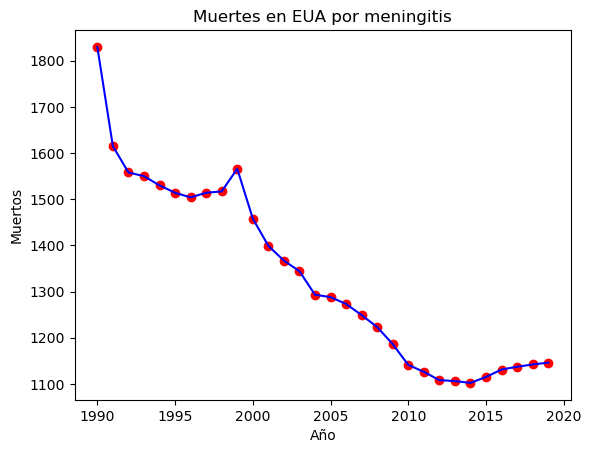

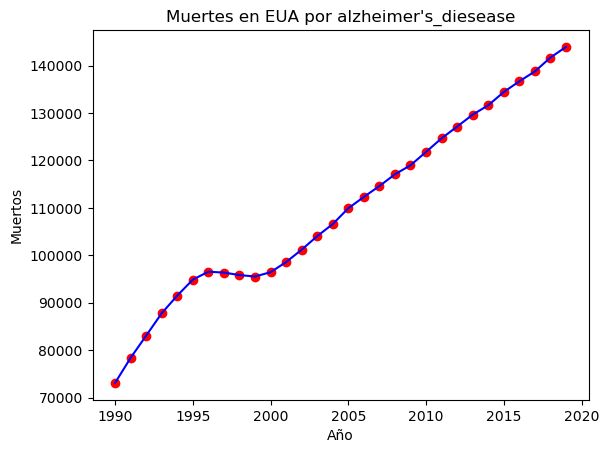

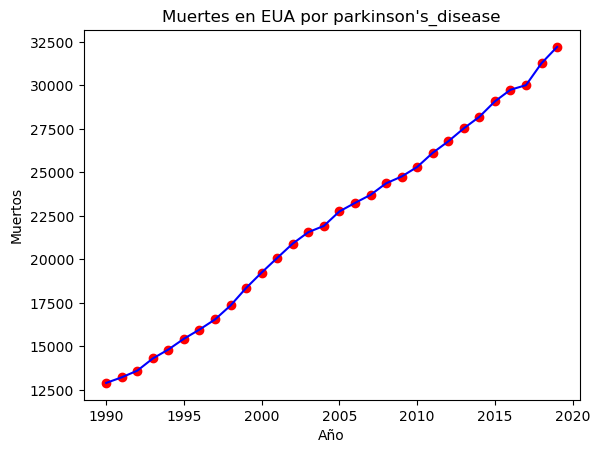

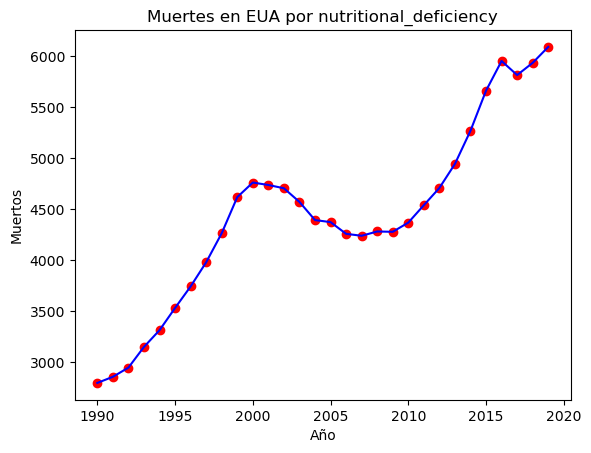

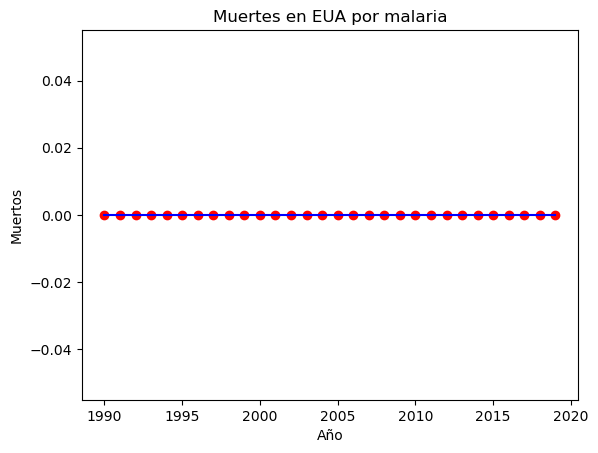

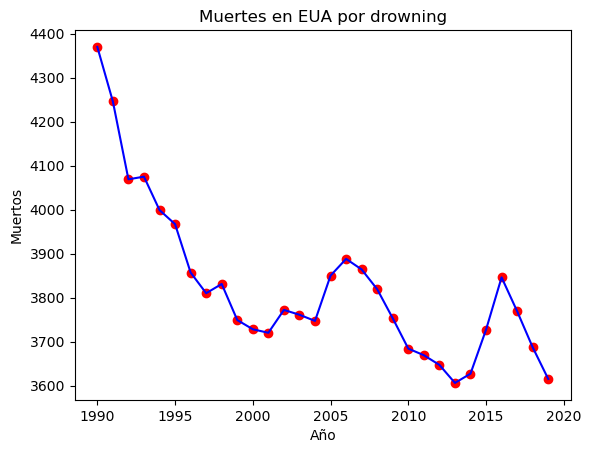

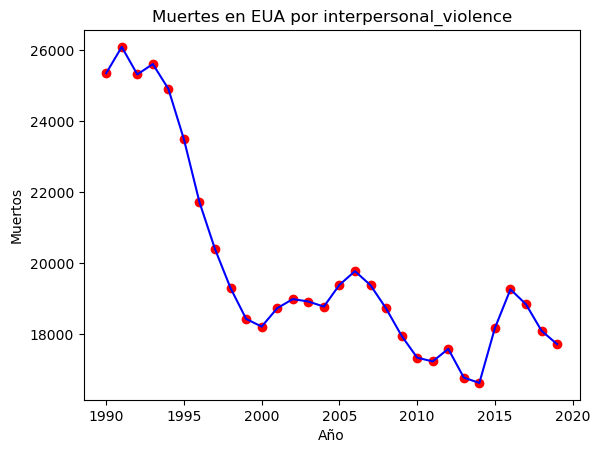

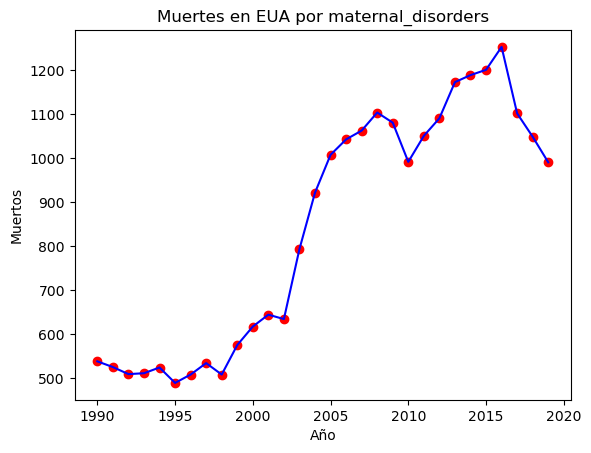

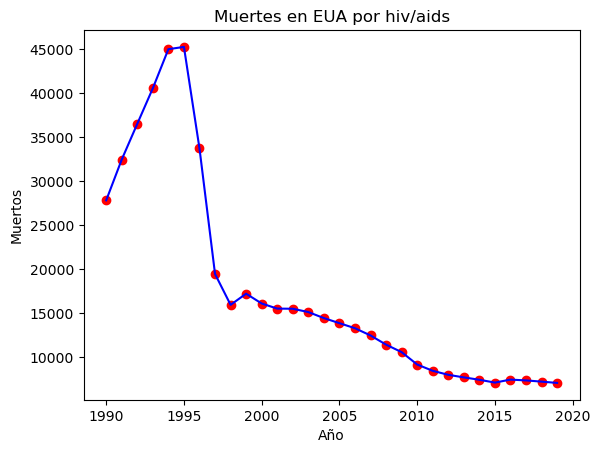

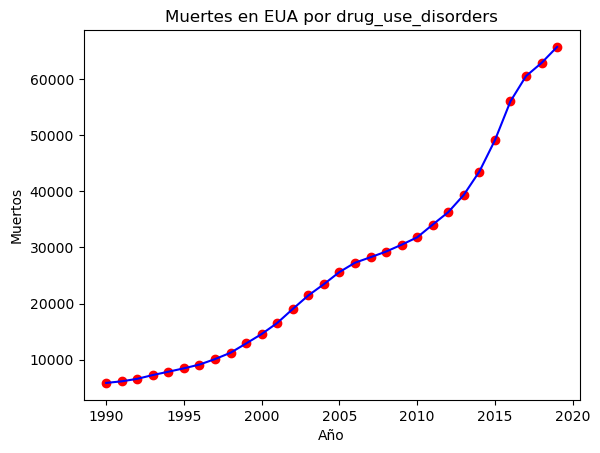

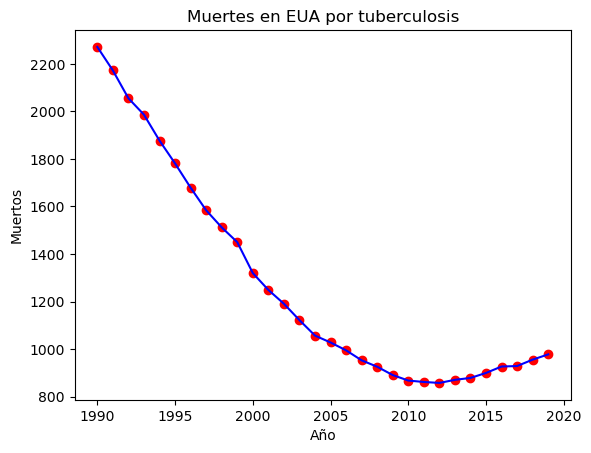

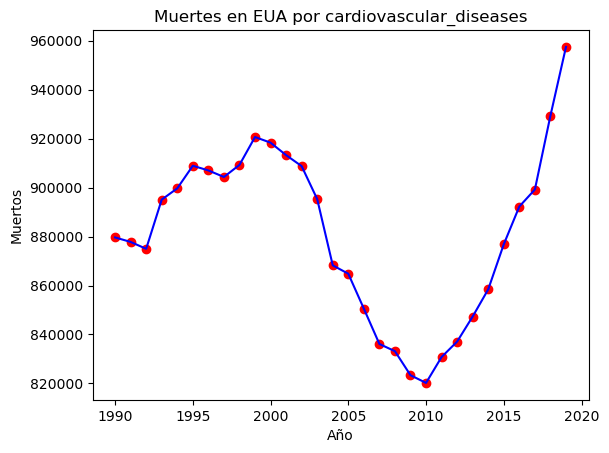

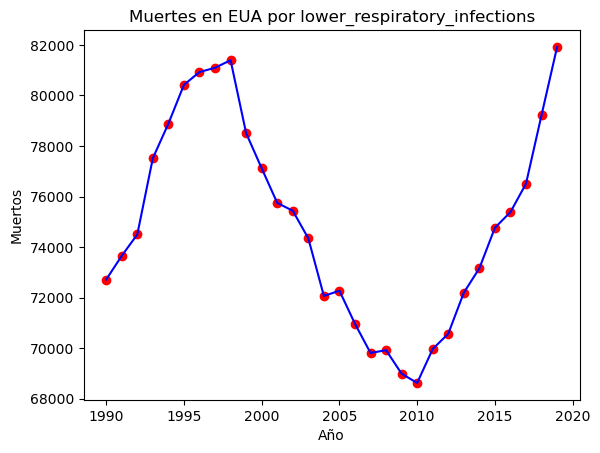

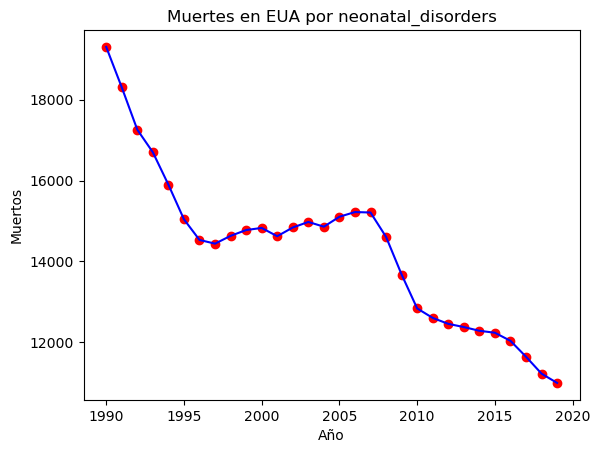

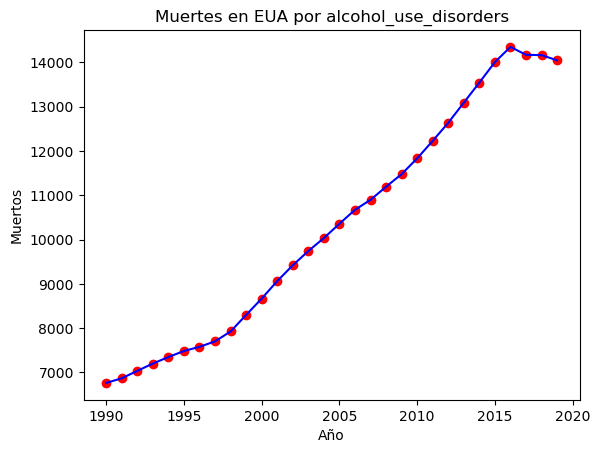

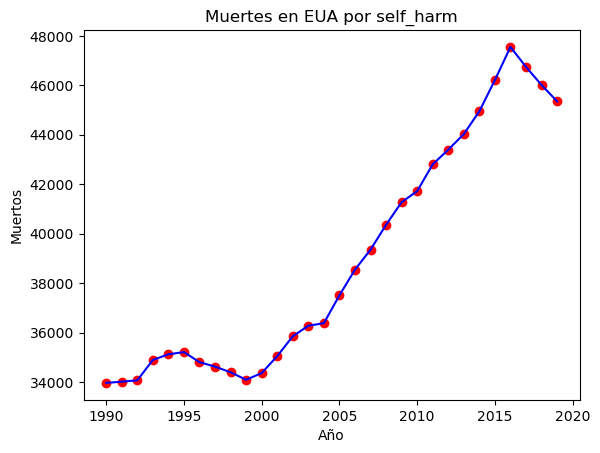

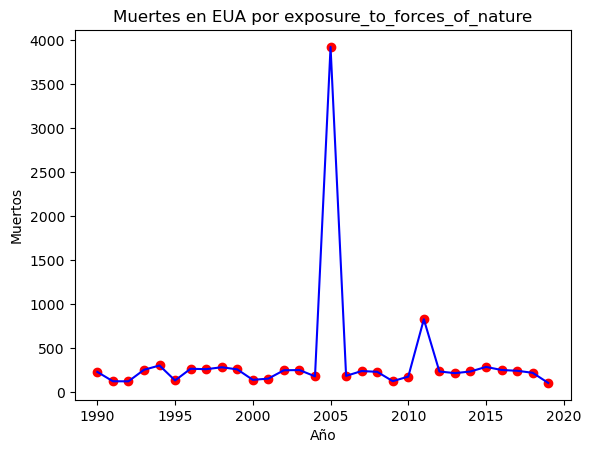

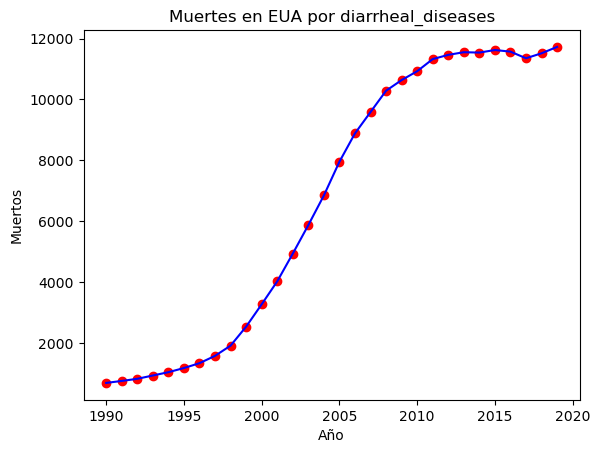

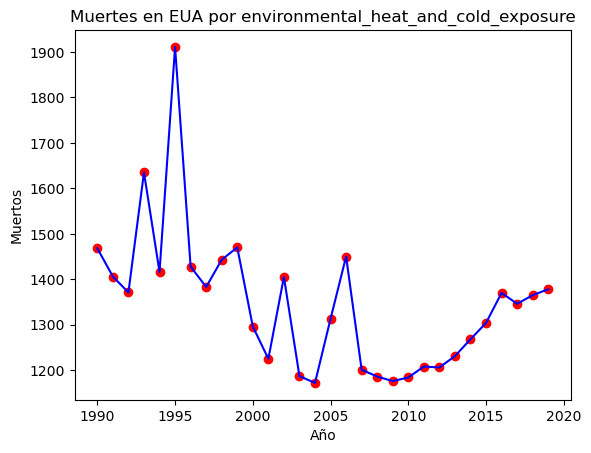

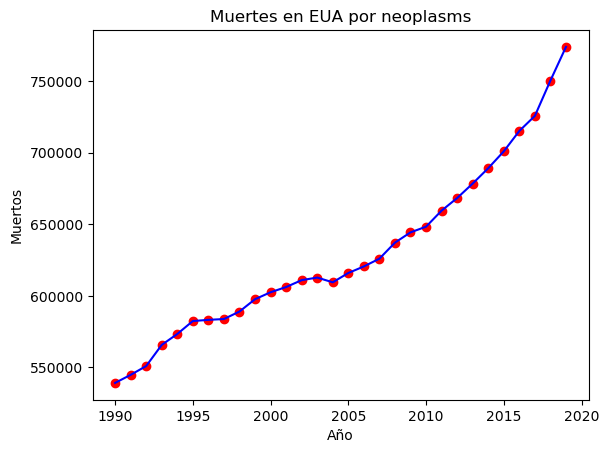

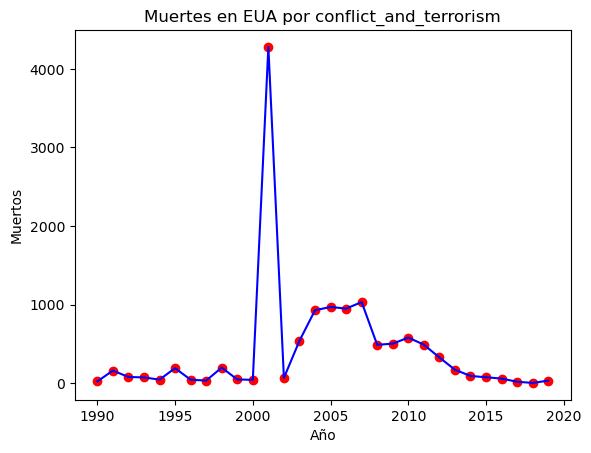

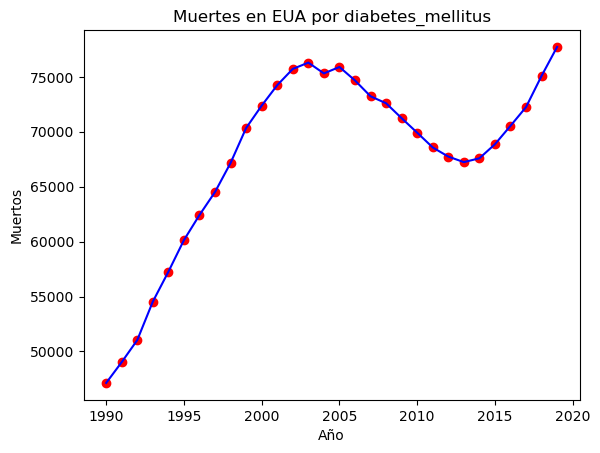

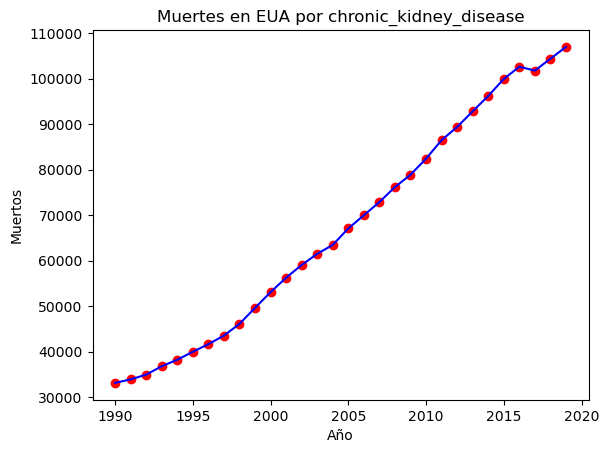

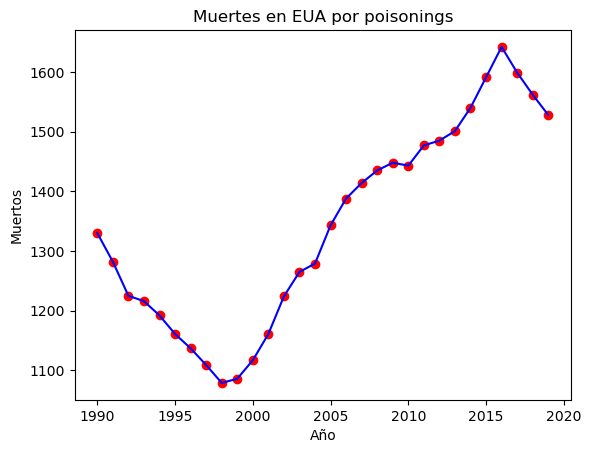

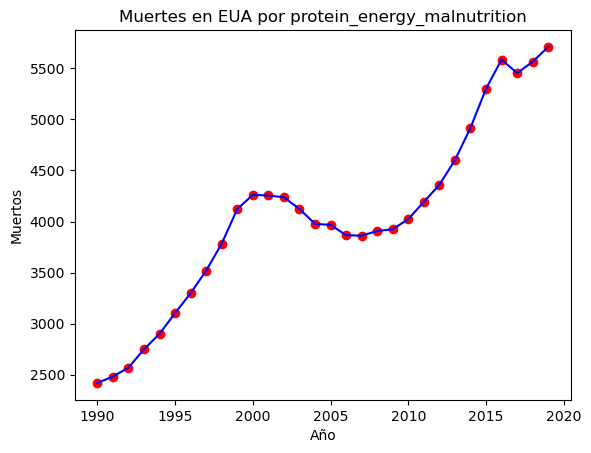

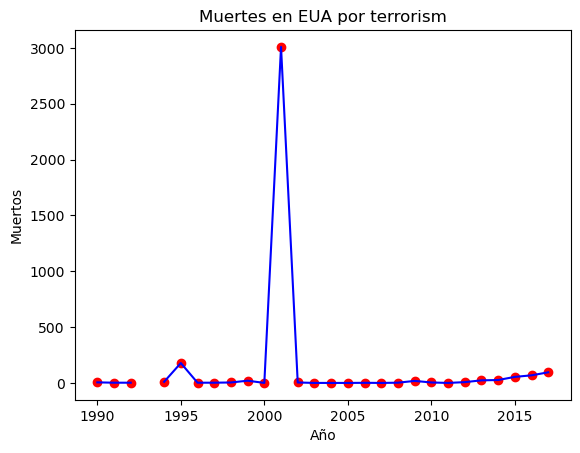

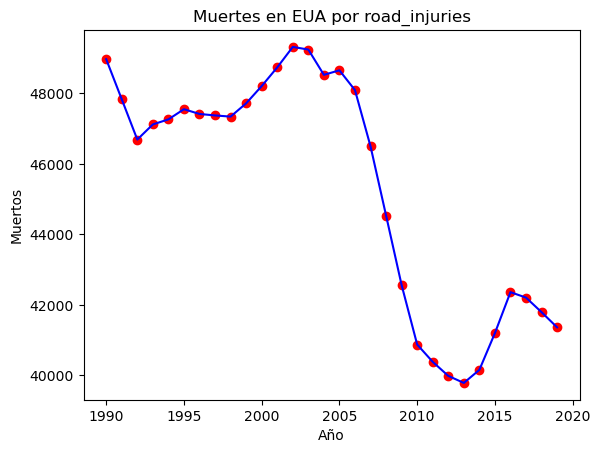

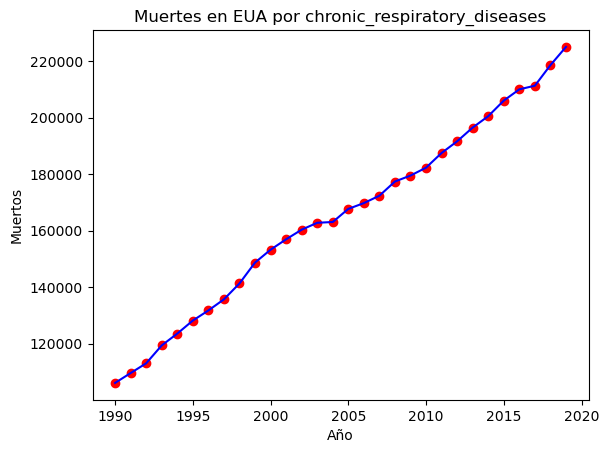

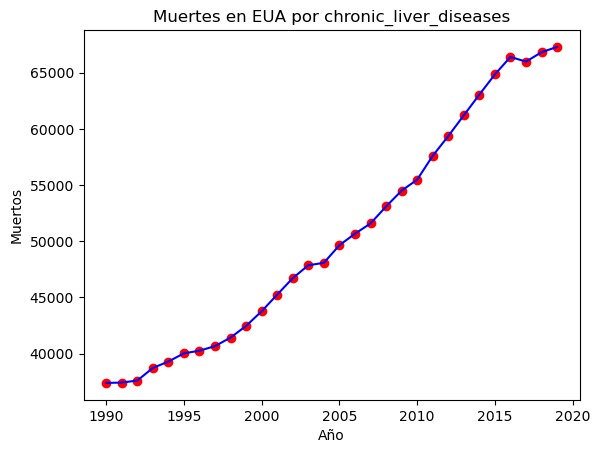

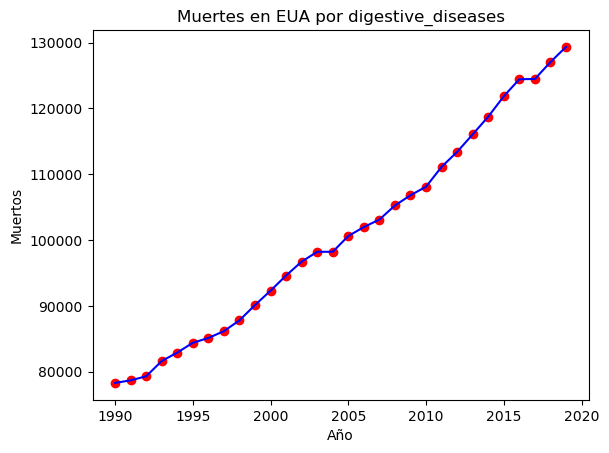

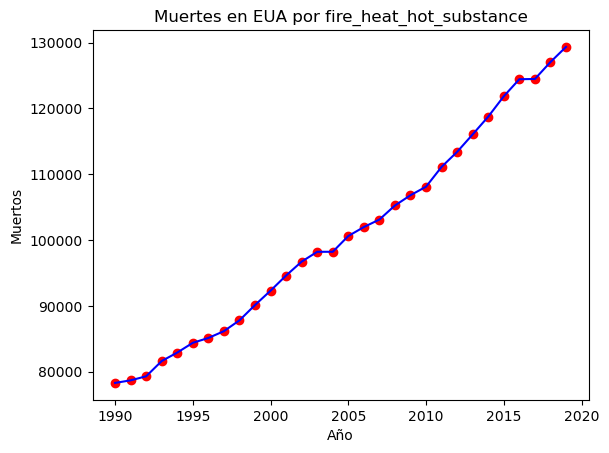

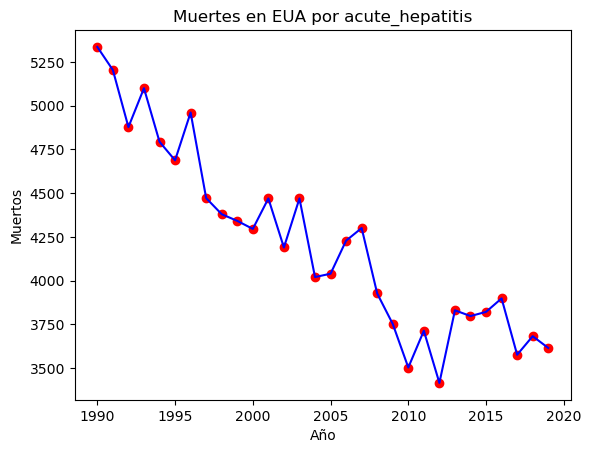

In [ ]:
#Graficos para EUA; variacion en las causas de muertes desde 1990 a 2019

# Lista de valores de i

i_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 30, 31, 32]
#Es una lista de índices que se utilizarán para seleccionar columnas específicas de un DataFrame y empieza desde el 1 poruqe la cero es el año y esa
#es la variable dependiente

# Lista de valores de r
r_values = ['meningitis', "alzheimer's_diesease", "parkinson's_disease",
       'nutritional_deficiency', 'malaria', 'drowning',
       'interpersonal_violence', 'maternal_disorders', 'hiv/aids',
       'drug_use_disorders', 'tuberculosis', 'cardiovascular_diseases',
       'lower_respiratory_infections', 'neonatal_disorders',
       'alcohol_use_disorders', 'self_harm', 'exposure_to_forces_of_nature',
       'diarrheal_diseases', 'environmental_heat_and_cold_exposure',
       'neoplasms', 'conflict_and_terrorism', 'diabetes_mellitus',
       'chronic_kidney_disease', 'poisonings', 'protein_energy_malnutrition',
       'terrorism', 'road_injuries', 'chronic_respiratory_diseases',
       'chronic_liver_diseases', 'digestive_diseases',
       'fire_heat_hot_substance', 'acute_hepatitis']#se utilizarán para los títulos de los gráficos.

# Iteramos sobre los valores de i y r
for i, r in zip(i_values, r_values):#zip lo usamos para emparejar los valores de dos listas en este caso
    # Seleccionamos los datos correspondientes
    x_data = df_unites.iloc[:, [0]]#variable independiente que usaremos para ver la evolucion del numero de enfermedades
    y_data = df_unites.iloc[:, [i]]#iterativamente se tomaran, de una en una, las columnas restantes excepto la de year que es la de posicion cero
    #y no esta incluida en i_values

    # Graficamos el gráfico de dispersión
    plt.plot(x_data, y_data, color='blue')
    plt.scatter(x_data, y_data, color='red')
    plt.title(f'Muertes en EUA por {r}')
    plt.xlabel('Año')
    plt.ylabel('Muertos')
    plt.show()


#note que podemos mejorar la calidad del grafico(mejorar colores, puntos, titulos, leyendas), pero por cuestiones practicas, asi se dejará

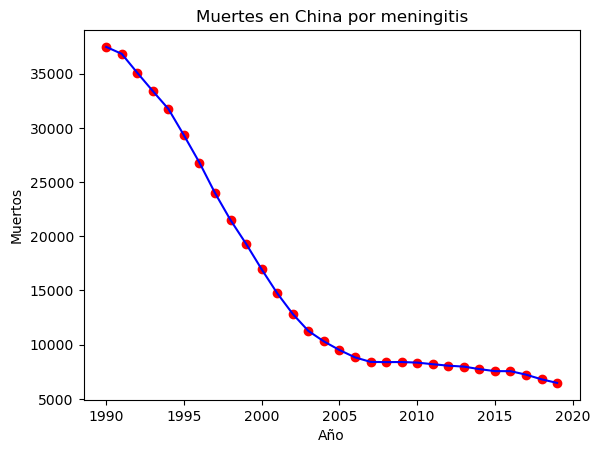

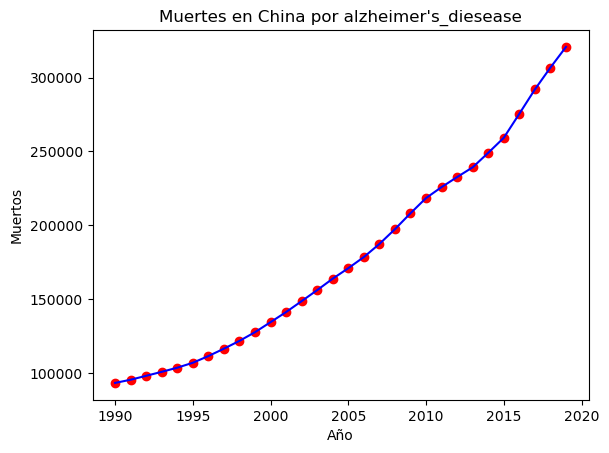

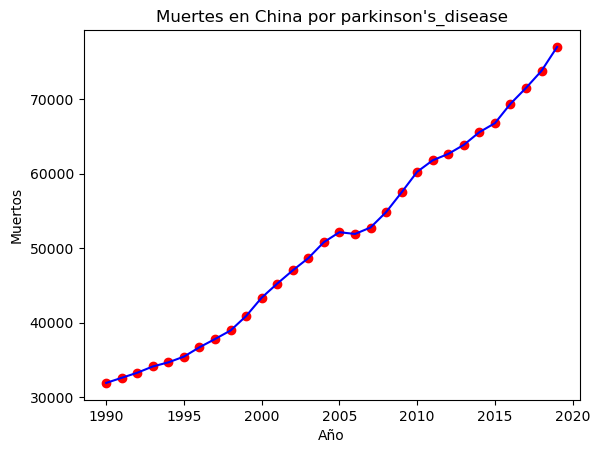

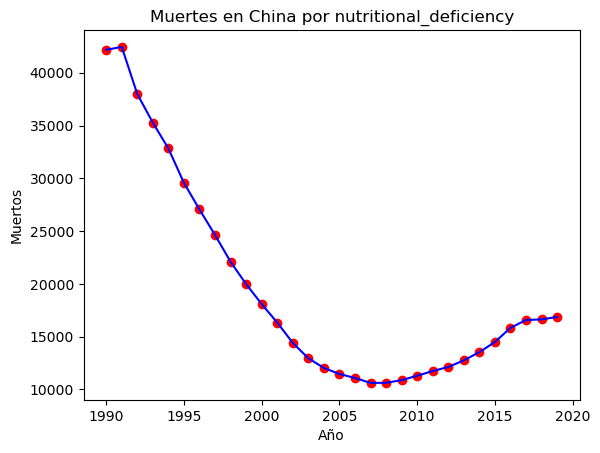

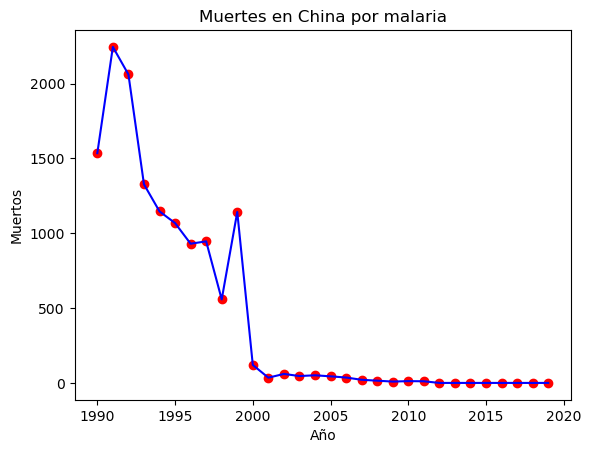

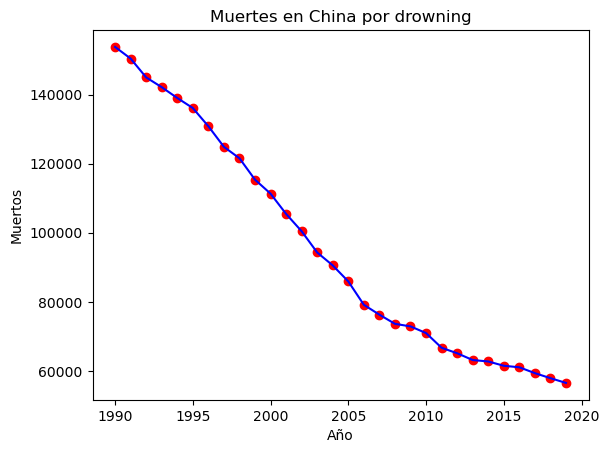

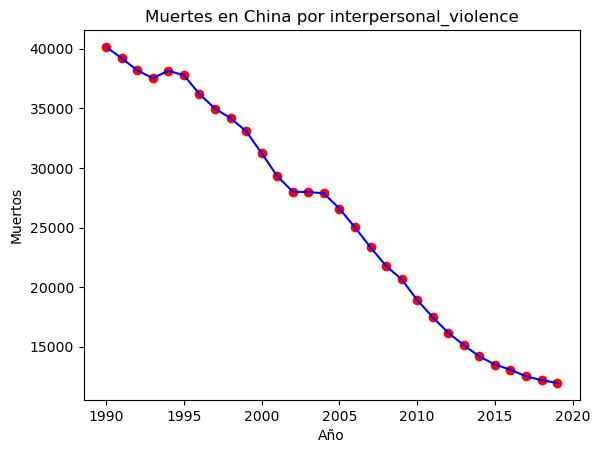

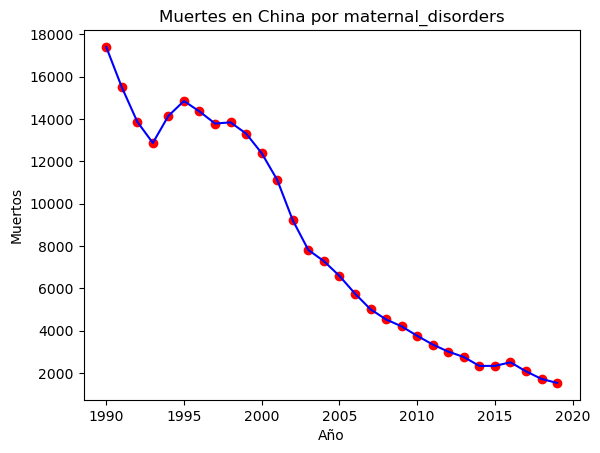

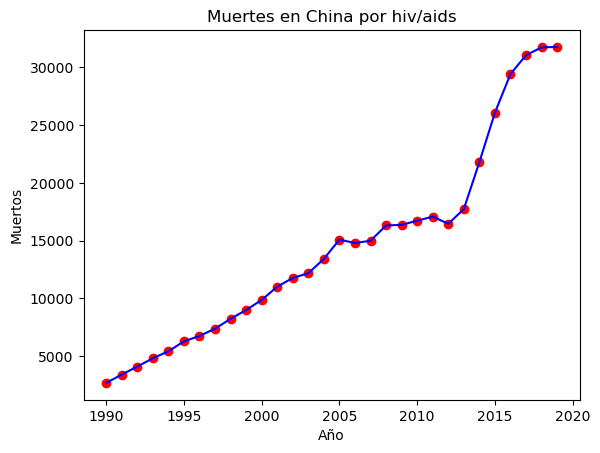

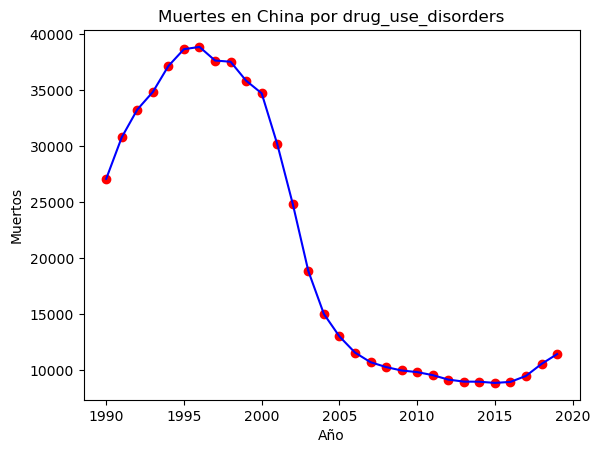

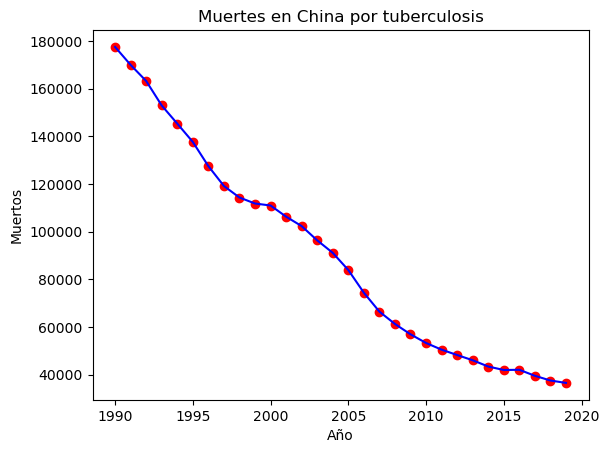

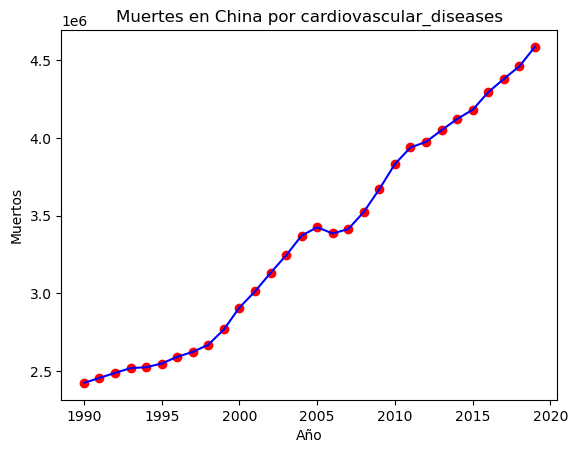

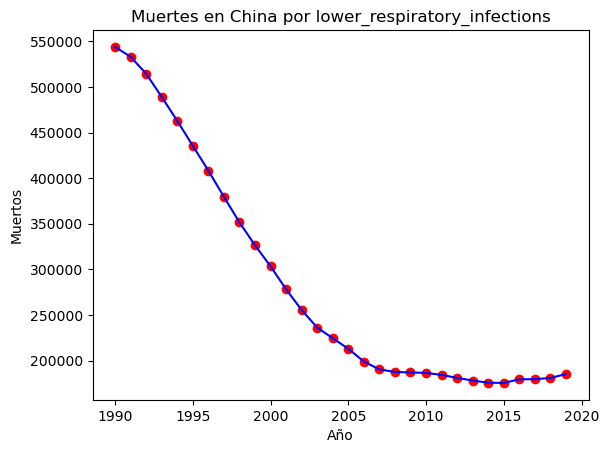

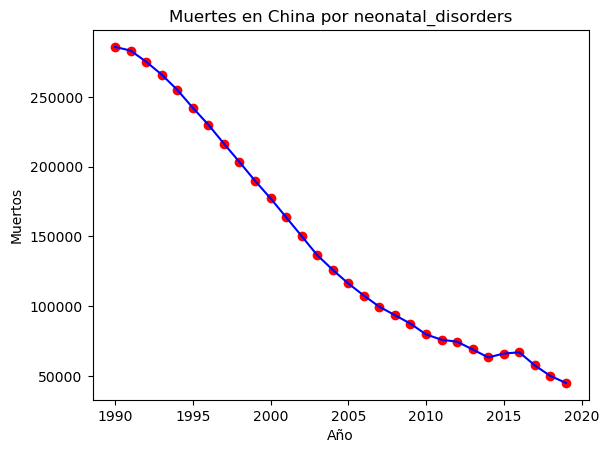

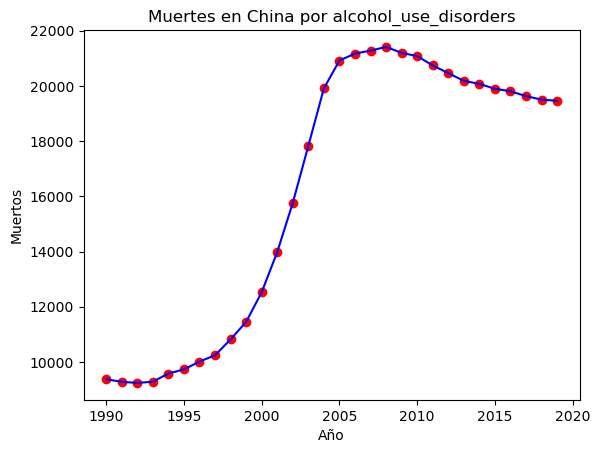

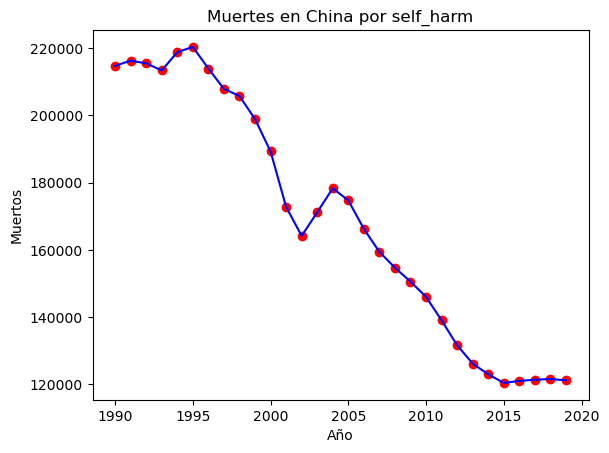

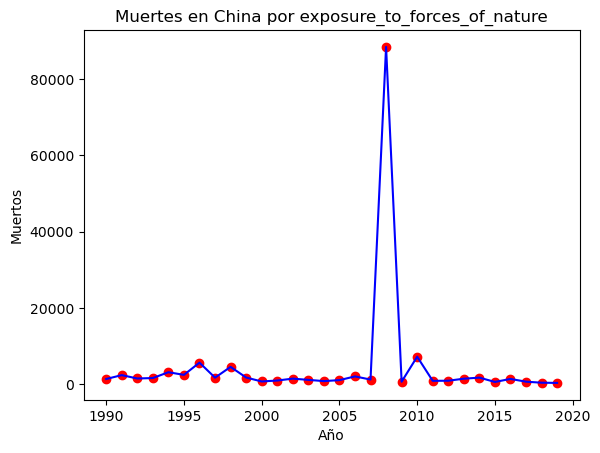

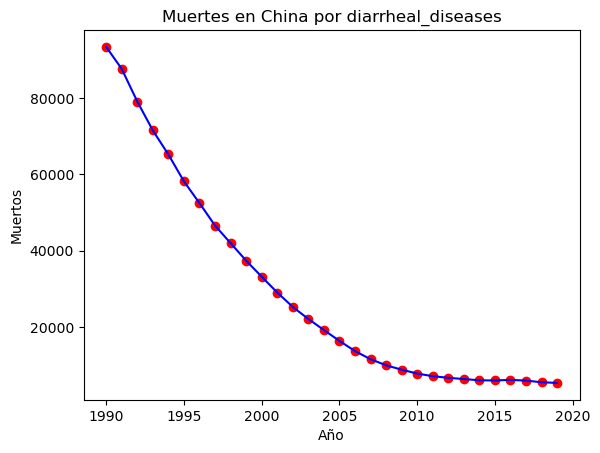

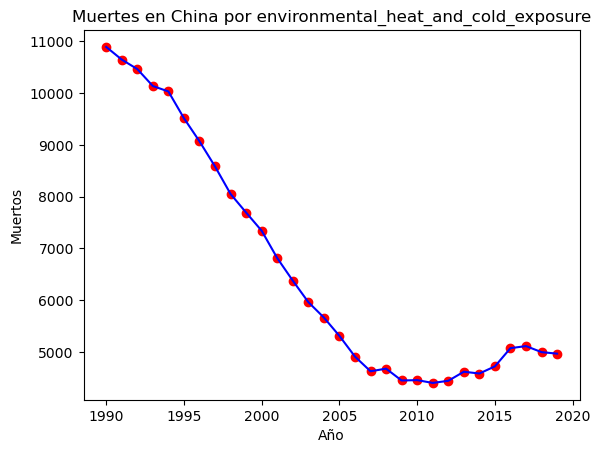

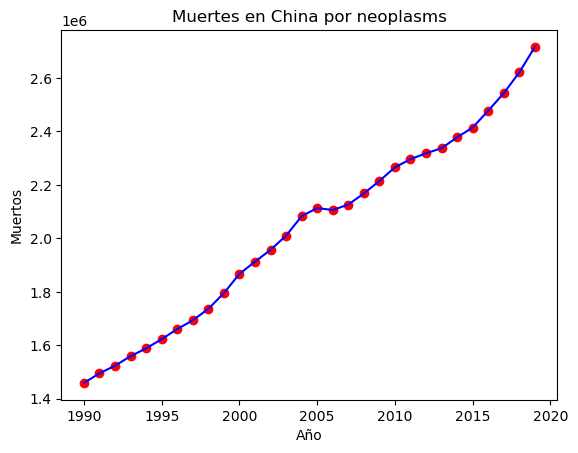

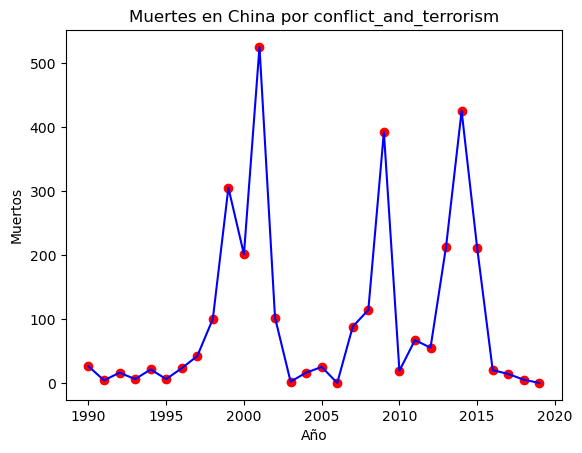

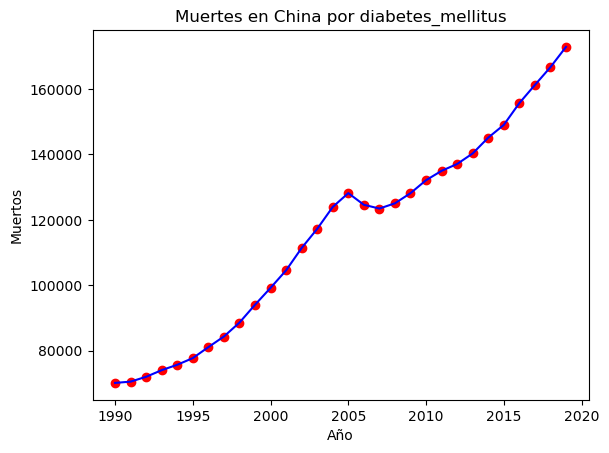

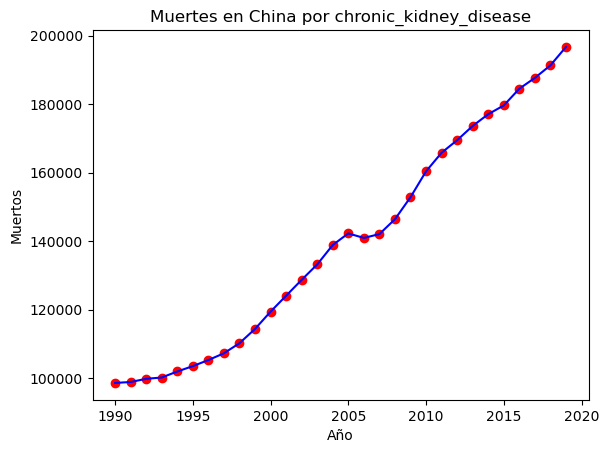

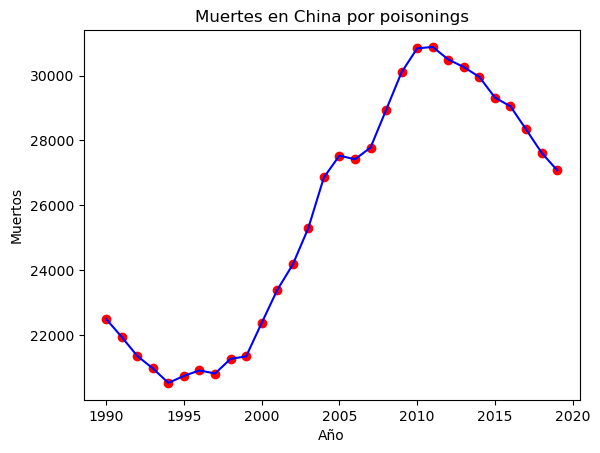

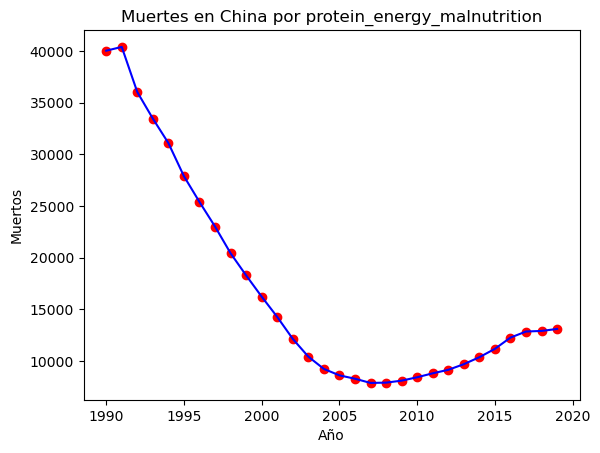

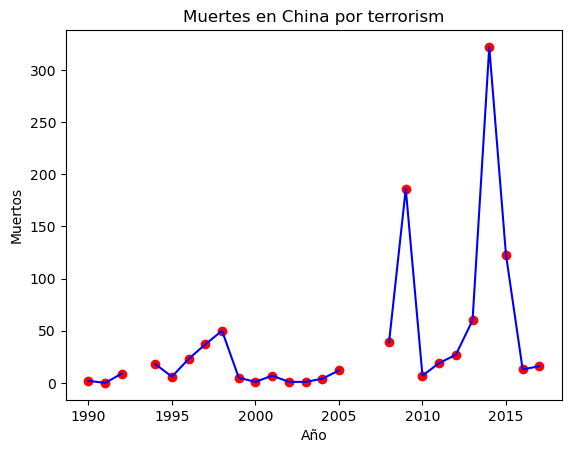

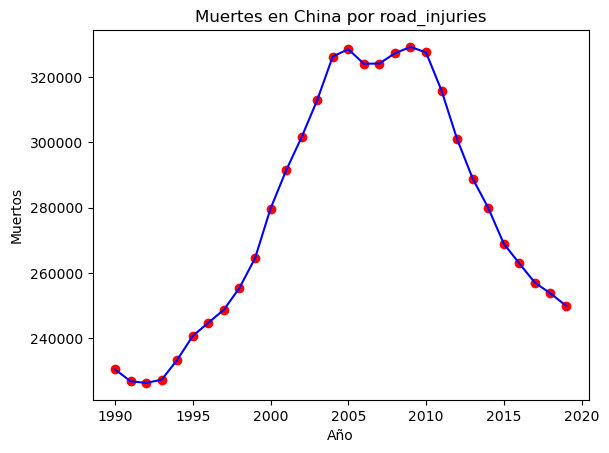

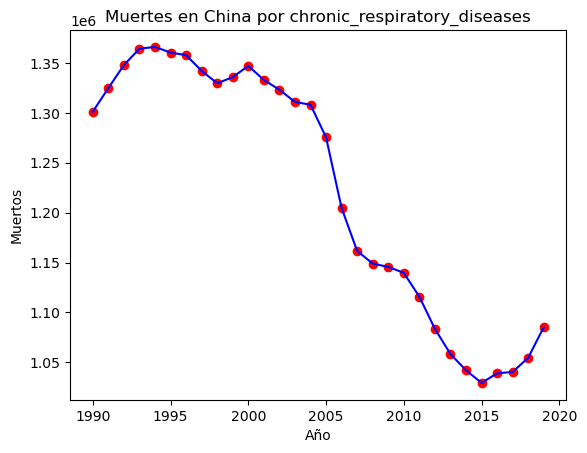

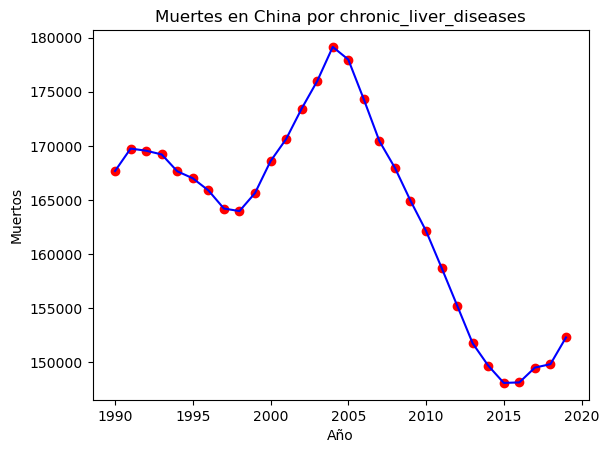

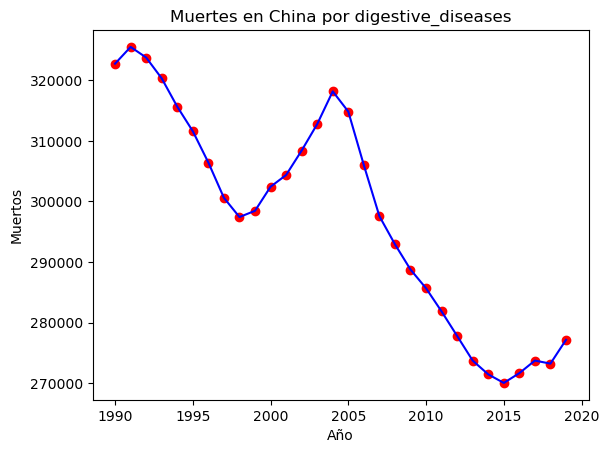

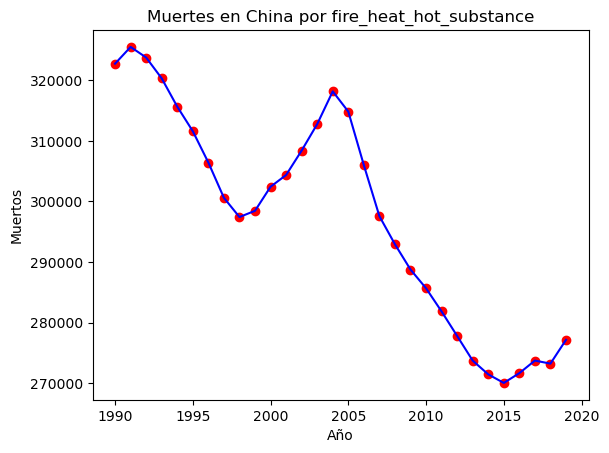

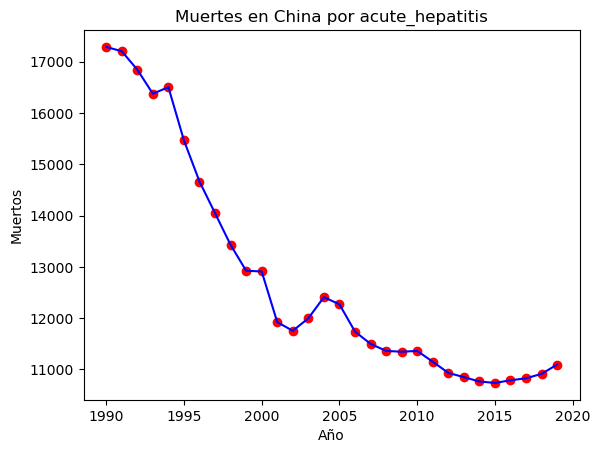

In [ ]:
#Graficos para China; cambio en las muertes desde 1990 a 2019

# Lista de valores de i
j_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 30, 31, 32]

# Lista de valores de r
s_values = ['meningitis', "alzheimer's_diesease", "parkinson's_disease",
       'nutritional_deficiency', 'malaria', 'drowning',
       'interpersonal_violence', 'maternal_disorders', 'hiv/aids',
       'drug_use_disorders', 'tuberculosis', 'cardiovascular_diseases',
       'lower_respiratory_infections', 'neonatal_disorders',
       'alcohol_use_disorders', 'self_harm', 'exposure_to_forces_of_nature',
       'diarrheal_diseases', 'environmental_heat_and_cold_exposure',
       'neoplasms', 'conflict_and_terrorism', 'diabetes_mellitus',
       'chronic_kidney_disease', 'poisonings', 'protein_energy_malnutrition',
       'terrorism', 'road_injuries', 'chronic_respiratory_diseases',
       'chronic_liver_diseases', 'digestive_diseases',
       'fire_heat_hot_substance', 'acute_hepatitis']

# Iteramos sobre los valores de i y r
for j, s in zip(j_values, s_values):
    # Seleccionamos los datos correspondientes
    x_data = df_chi.iloc[:, [0]]
    y_data = df_chi.iloc[:, [j]]

    # Graficamos el gráfico de dispersión
    plt.plot(x_data, y_data, color='blue')
    plt.scatter(x_data, y_data, color='red')
    plt.title(f'Muertes en China por {s}')
    plt.xlabel('Año')
    plt.ylabel('Muertos')
    plt.show()

### Análisis de resultados; comparación entre EUA y China

In [ ]:
df_chi.shape

(30, 33)

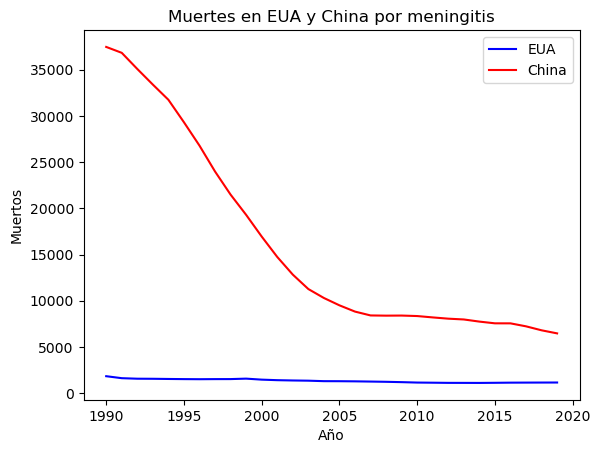

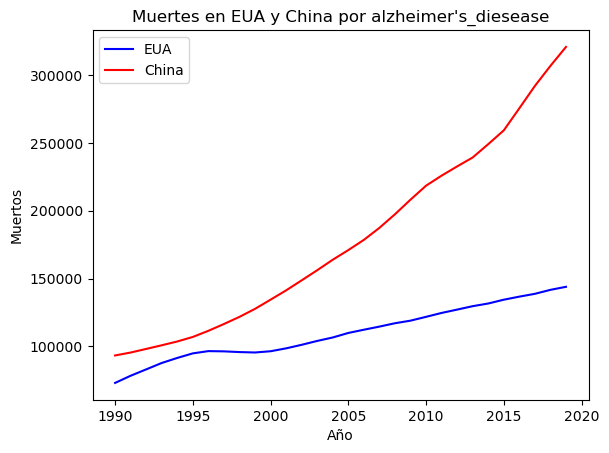

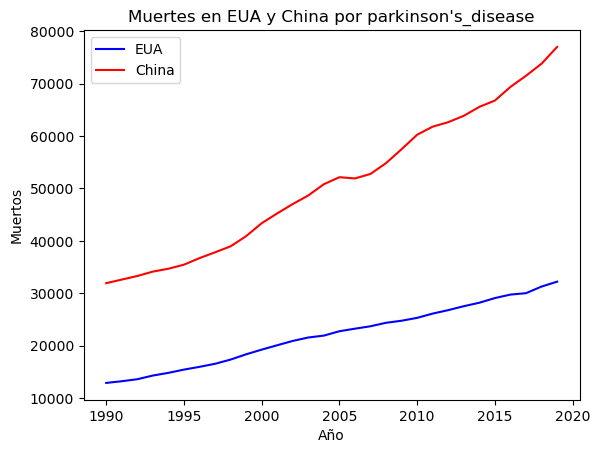

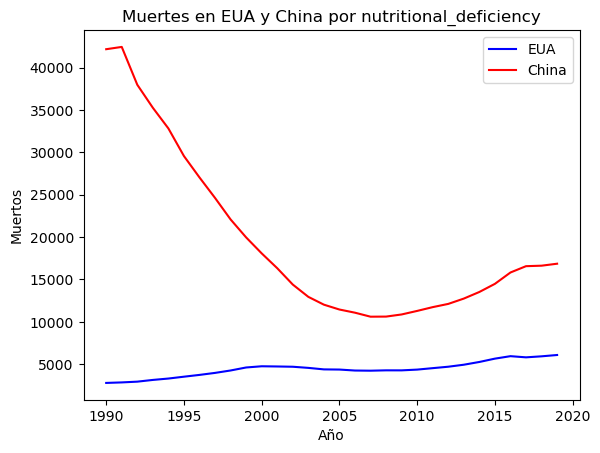

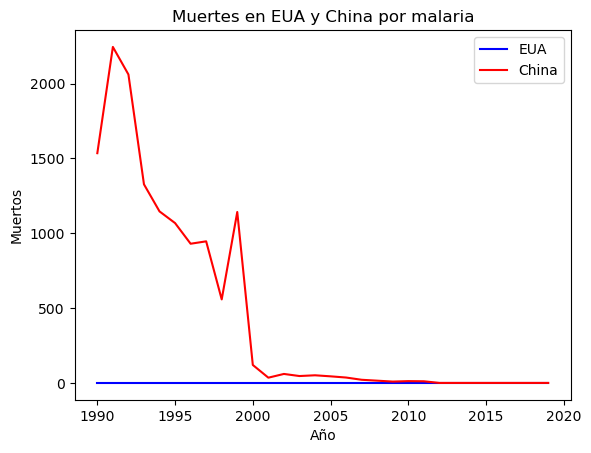

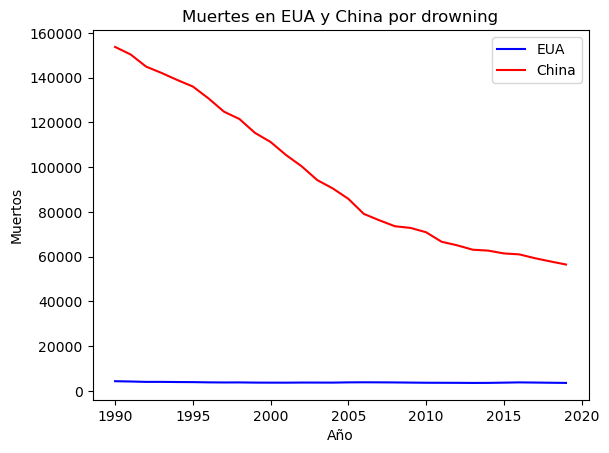

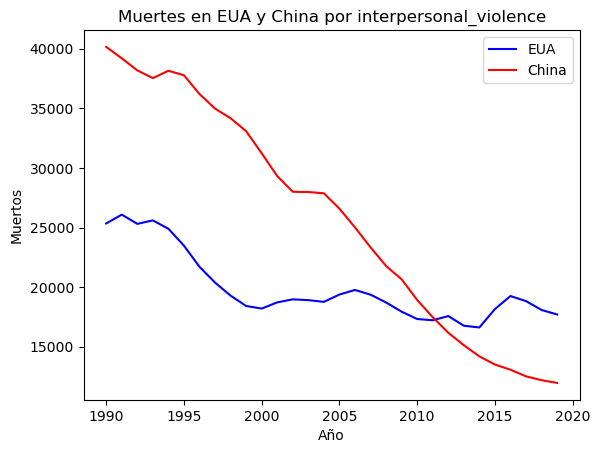

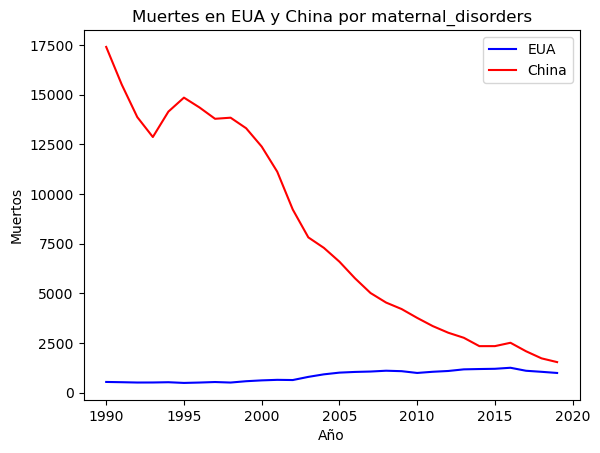

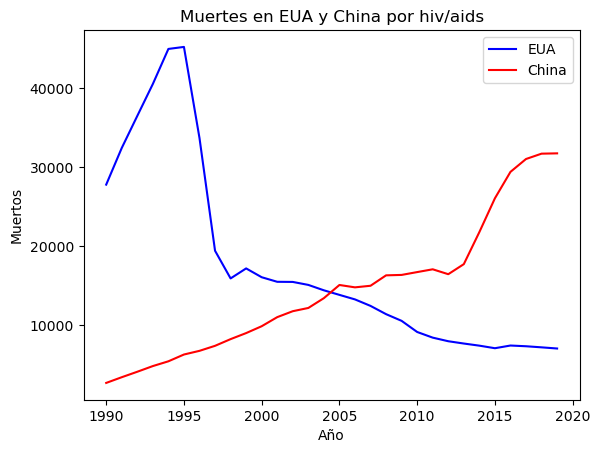

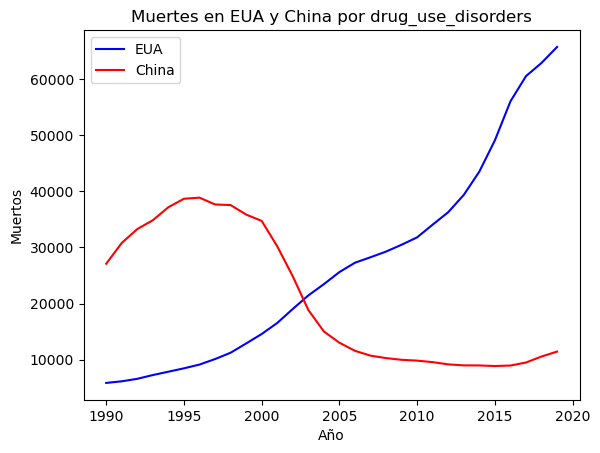

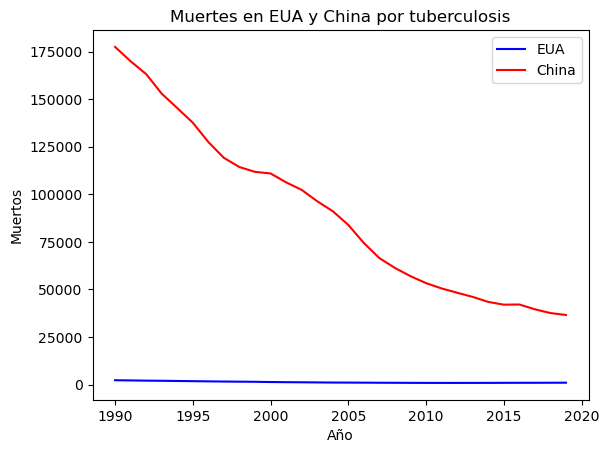

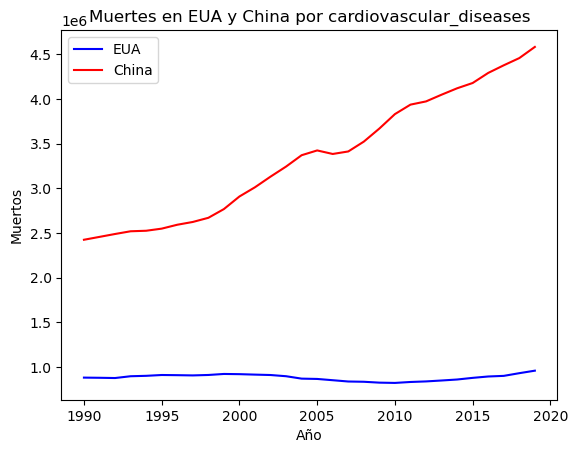

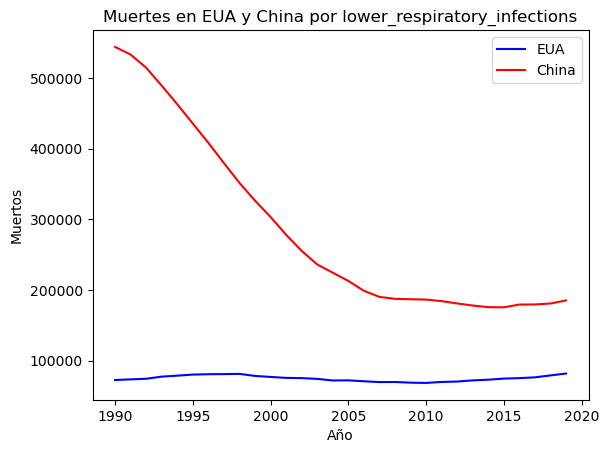

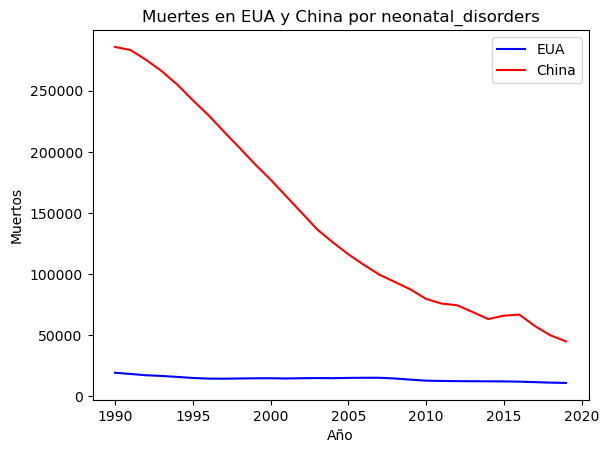

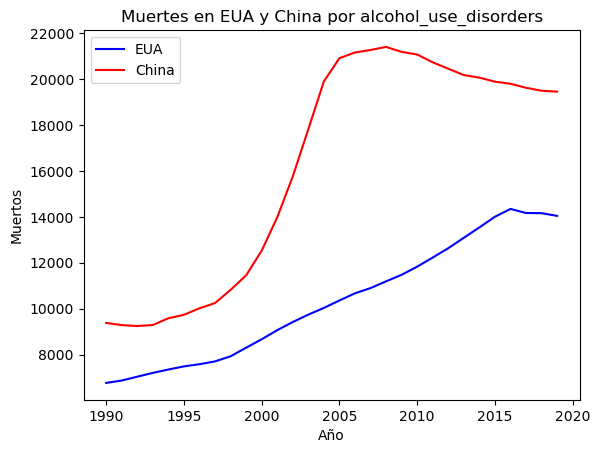

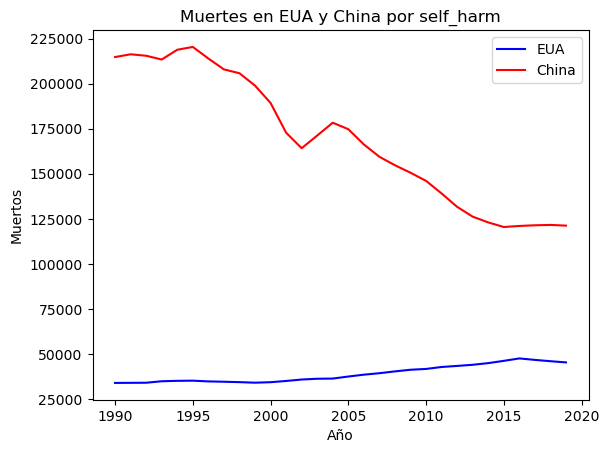

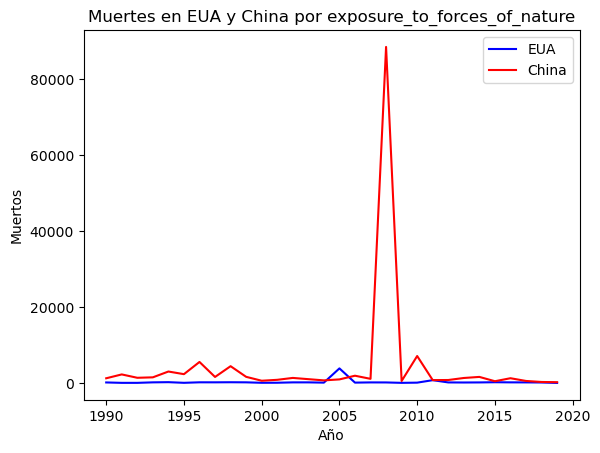

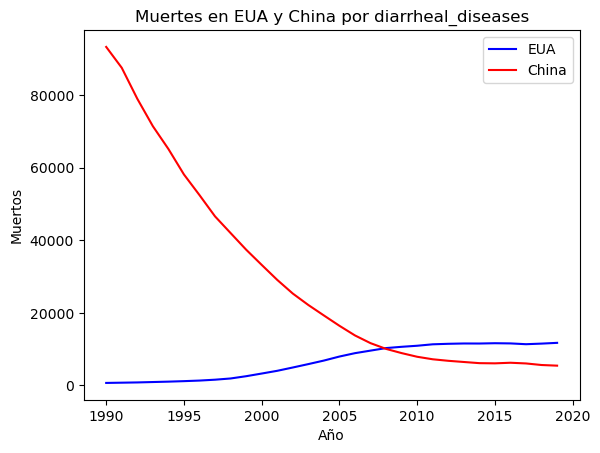

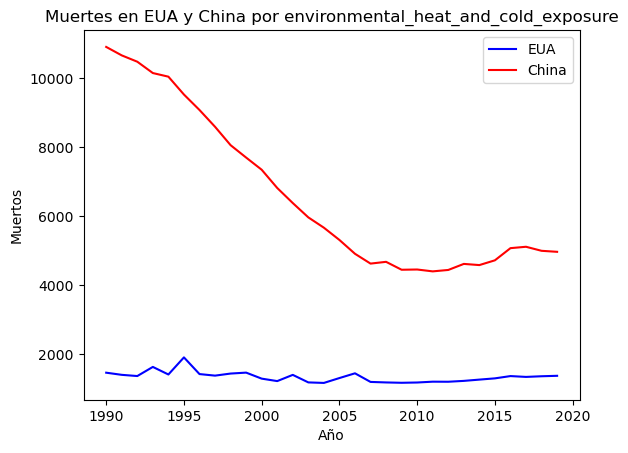

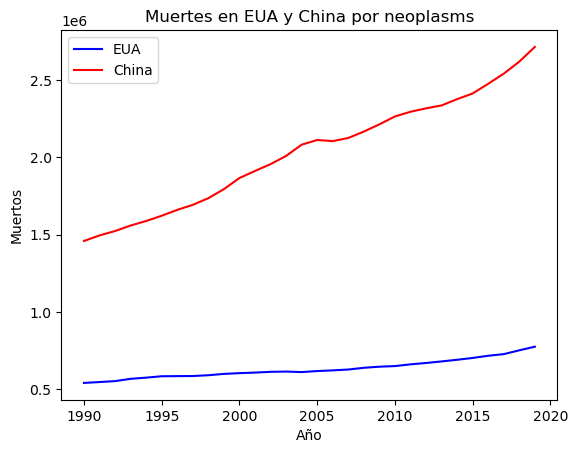

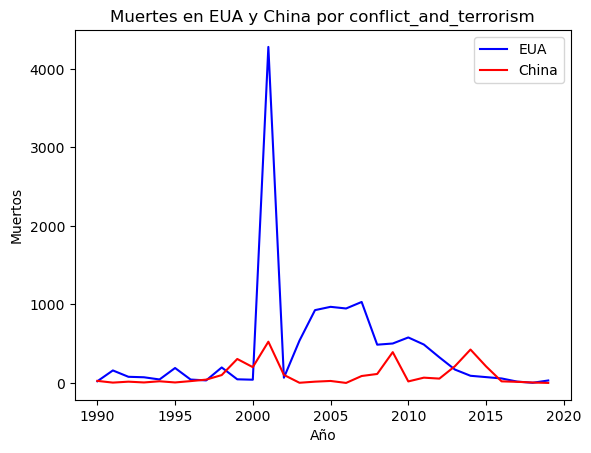

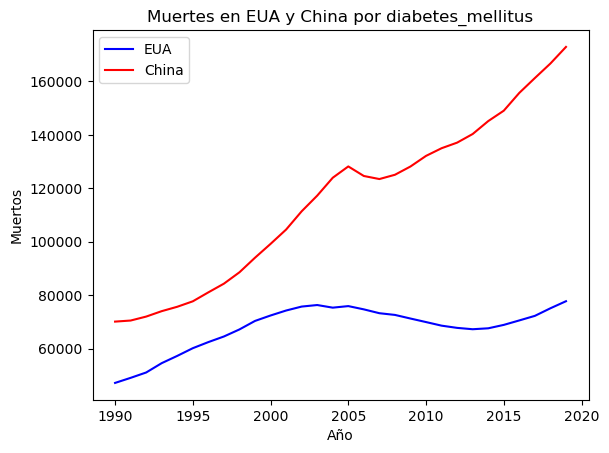

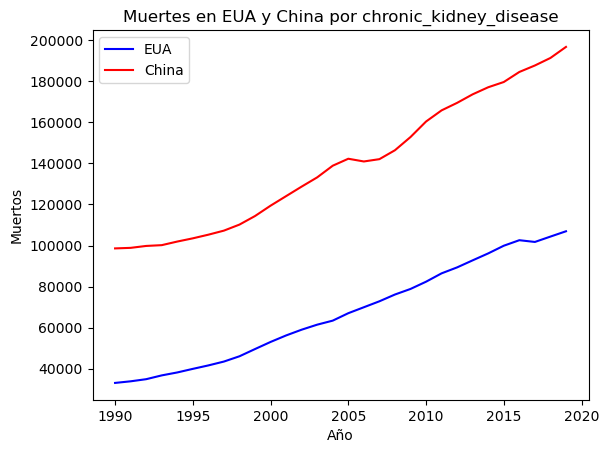

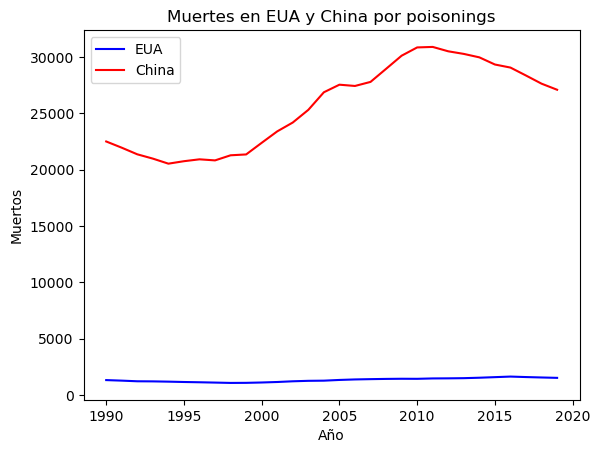

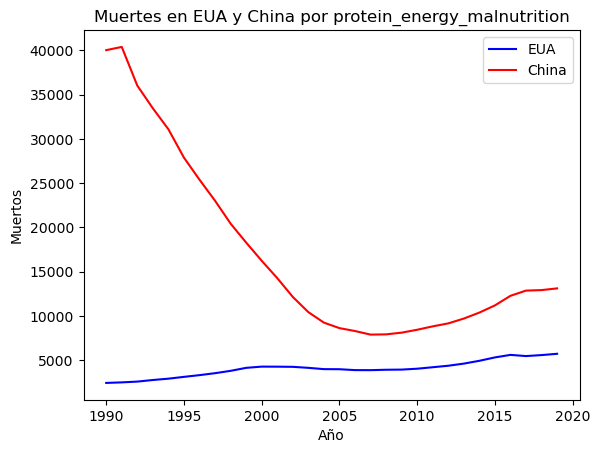

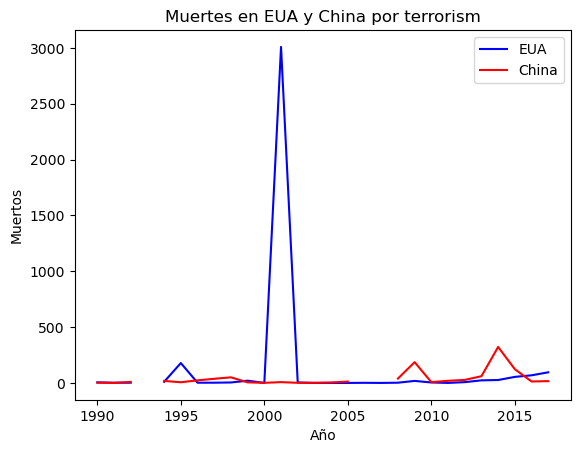

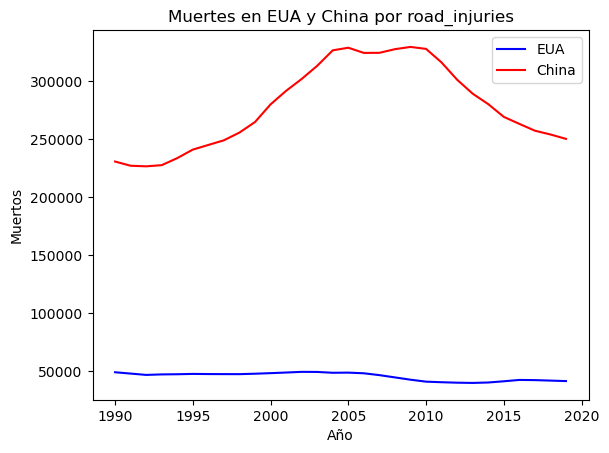

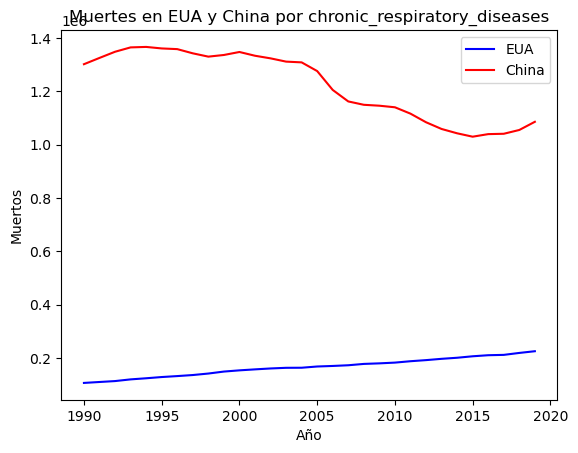

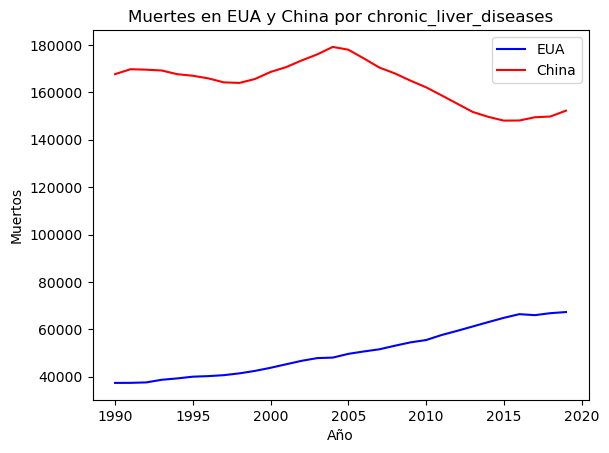

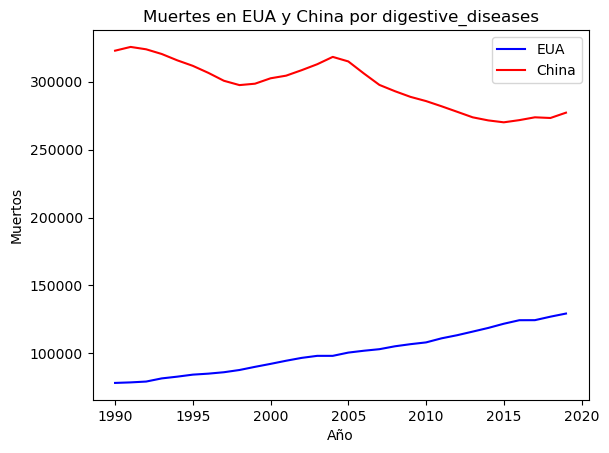

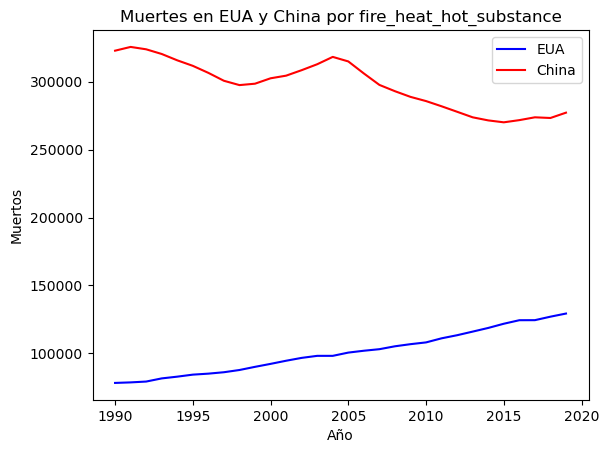

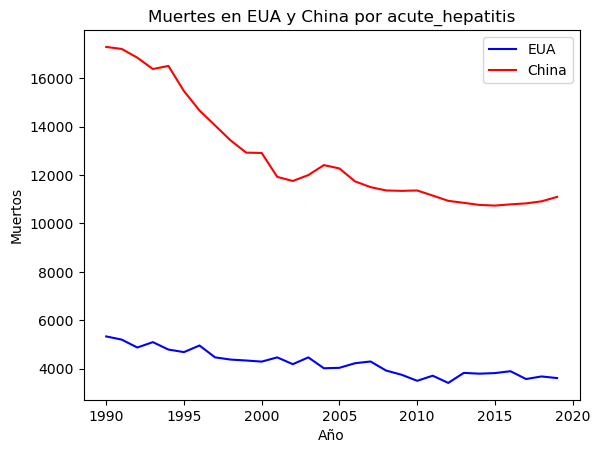

In [ ]:
#Finalmente podemos hacer comparaciones en ambos conjuntos de graficos, ya que ese es el objetivo del proyecto
# Lista de valores de i
i_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 30, 31, 32]

# Lista de valores de r
r_values = ['meningitis', "alzheimer's_diesease", "parkinson's_disease",
       'nutritional_deficiency', 'malaria', 'drowning',
       'interpersonal_violence', 'maternal_disorders', 'hiv/aids',
       'drug_use_disorders', 'tuberculosis', 'cardiovascular_diseases',
       'lower_respiratory_infections', 'neonatal_disorders',
       'alcohol_use_disorders', 'self_harm', 'exposure_to_forces_of_nature',
       'diarrheal_diseases', 'environmental_heat_and_cold_exposure',
       'neoplasms', 'conflict_and_terrorism', 'diabetes_mellitus',
       'chronic_kidney_disease', 'poisonings', 'protein_energy_malnutrition',
       'terrorism', 'road_injuries', 'chronic_respiratory_diseases',
       'chronic_liver_diseases', 'digestive_diseases',
       'fire_heat_hot_substance', 'acute_hepatitis']

# Iteramos sobre los valores de i y r
for i, r in zip(i_values, r_values):
    # Seleccionamos los datos
    x_data = df_unites.iloc[:, [0]]
    y_data1 = df_unites.iloc[:, [i]]
    y_data2 = df_chi.iloc[:, [i]]

    # Graficamos
    plt.plot(x_data, y_data1, color='blue', label='EUA')
    plt.plot(x_data, y_data2, color='red', label='China')
    plt.title(f'Muertes en EUA y China por {r}')
    plt.xlabel('Año')
    plt.ylabel('Muertos')
    plt.legend()
    plt.show()
